In [1]:
import pandas as pd
pd.set_option("display.max_columns",999)
from Bio import SeqIO
from Bio import Seq
from Bio.SeqUtils import GC
from Bio.Alphabet import generic_dna
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from subprocess import *
%matplotlib inline

In [2]:
RBS_df=pd.read_excel('/home/m/Dropbox/Clostridium_paper/supplementary_table_with_AU_20171030.xls')

In [3]:
infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
genes =[]
name = []
product = []
func = []
strand = []
start = []
stop = []
aaseq = []
cds_seq = []
old_tag=[]

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
for feature in infile.features:
    if feature.type == 'CDS' or feature.type == 'rRNA' or feature.type == 'tRNA':  #Only cares for coding sequences which are not pseudogenes
        genes.append(feature.qualifiers['locus_tag'][0])
        try: old_tag.append(feature.qualifiers['old_locus_tag'][0])
        except: old_tag.append('')
        try: name.append(feature.qualifiers['gene'][0])
        except: name.append('')
        product.append(feature.qualifiers['product'][0])
        cds_seq.append(feature.location.extract(infile.seq).tostring())
        if 'function' in feature.qualifiers:                       #not all genes have known functions
            func.append(feature.qualifiers['function'][0])
        else:
            func.append("N/A")
        try:
            aaseq.append(feature.qualifiers['translation'][0])
        except:
            aaseq.append("N/A")
        if feature.strand == 1:
            strand.append("plus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
        elif feature.strand == -1:
            strand.append("minus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
gene_df = pd.DataFrame({"gene_id": genes, 'old_gene_id':old_tag, "name": name, "product": product, "function": func, "strand": strand, "start": start, "stop": stop, "cds_seq":cds_seq,"aaseq": aaseq},
                          columns = ["gene_id", "old_gene_id","name", "function", "product", "strand", "start", "stop", "cds_seq","aaseq"])

/home/m/anaconda2/lib/python2.7/site-packages/Bio/Seq.py:341: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


In [4]:
gene_df=gene_df[['gene_id', 'cds_seq']]
RBS_df = pd.merge(RBS_df,gene_df)

In [5]:
RBS_df.to_csv('/home/m/Desktop/for_Ben.csv', sep='\t')

In [6]:
RBS_df=pd.read_csv('/home/m/Desktop/for_Ben.csv', sep='\t')

In [7]:
gc_ar=[]
for i,r in RBS_df.iterrows():
    gc_ar.append(100-GC(r['cds_seq']))
    
RBS_df.loc[:,'AU_coding']=gc_ar

In [240]:
ll=25
hh=75
co_p25=RBS_df[RBS_df.co_te < np.percentile(RBS_df.co_te, ll)]
co_p75=RBS_df[RBS_df.co_te > np.percentile(RBS_df.co_te, hh)]
h2c_p25=RBS_df[RBS_df.h2c_te < np.percentile(RBS_df.h2c_te, ll)]
h2c_p75=RBS_df[RBS_df.h2c_te > np.percentile(RBS_df.h2c_te,hh)]
hf_p25=RBS_df[RBS_df.hf_te < np.percentile(RBS_df.hf_te, ll)]
hf_p75=RBS_df[RBS_df.hf_te > np.percentile(RBS_df.hf_te, hh)]

In [241]:
co_p25=co_p25.sort_values('av_rna_rpkm_co',).reset_index()
co_p75=co_p75.sort_values('av_rna_rpkm_co',).reset_index()
h2c_p25 = h2c_p25.sort_values('av_rna_rpkm_h2c').reset_index()
h2c_p75 = h2c_p75.sort_values('av_rna_rpkm_h2c').reset_index()
hf_p25=hf_p25.sort_values('av_rna_rpkm_hf').reset_index()
hf_p75=hf_p75.sort_values('av_rna_rpkm_hf').reset_index()

In [242]:
co_p25=co_p25[['gene_id', 'av_ribo_rpkm_co', 'av_rna_rpkm_co', 'co_te']]
co_p75=co_p75[['gene_id', 'av_ribo_rpkm_co', 'av_rna_rpkm_co', 'co_te']]
h2c_p25=h2c_p25[['gene_id', 'av_ribo_rpkm_h2c', 'av_rna_rpkm_h2c', 'h2c_te']]
h2c_p75=h2c_p75[['gene_id', 'av_ribo_rpkm_h2c', 'av_rna_rpkm_h2c', 'h2c_te']]
hf_p25=hf_p25[['gene_id', 'av_ribo_rpkm_hf', 'av_rna_rpkm_hf', 'hf_te']]
hf_p75=hf_p75[['gene_id', 'av_ribo_rpkm_hf', 'av_rna_rpkm_hf', 'hf_te']]

SpearmanrResult(correlation=0.020063612811949239, pvalue=0.55224675651978972)

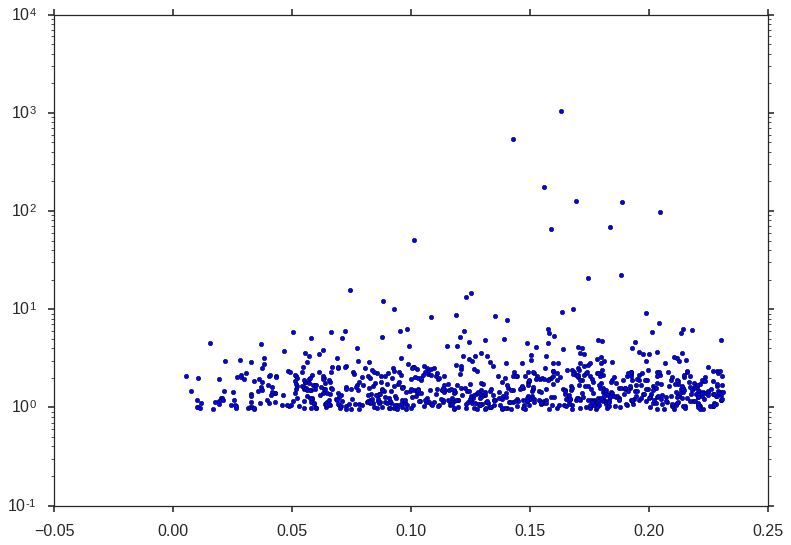

In [154]:
plt.scatter(h2c_p25.h2c_te, h2c_p75.h2c_te)
plt.yscale('log')
sp.stats.spearmanr(h2c_p25.h2c_te, h2c_p75.h2c_te )

SpearmanrResult(correlation=0.025887572890423032, pvalue=0.44308953965979758)

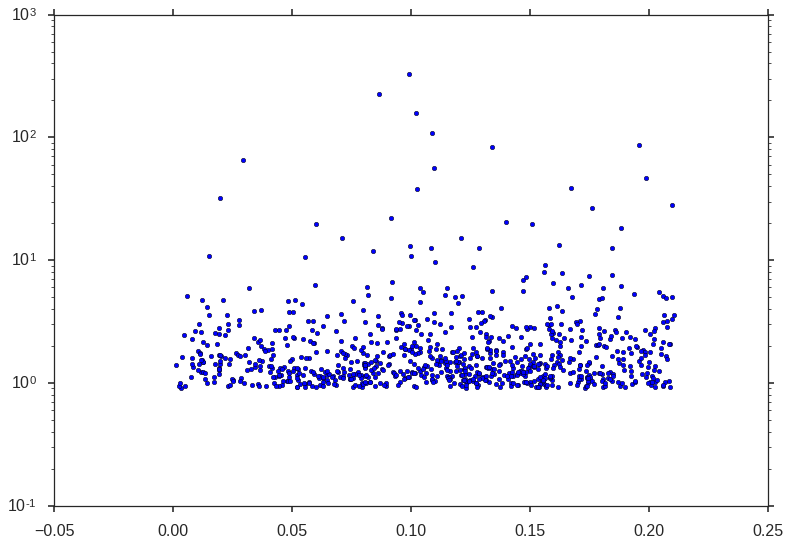

In [155]:
plt.scatter(hf_p25.hf_te, hf_p75.hf_te)
plt.yscale('log')
sp.stats.spearmanr(hf_p25.hf_te, hf_p75.hf_te )

##     
##     
##    
##       
##      
##      
##      
## See if there is any relationship between 5UTR features and TE for WLP

In [9]:
mev=RBS_df[['gene_id', 'cai', 'AU_coding', 'RBS_dg', 'RBS_dist_ATG', 'up_ATpercent', 'co_te','hf_te','h2c_te']]#, 'av_rna_rpkm_co',
#       'av_ribo_rpkm_hf','av_rna_rpkm_h2c']]
mev.to_csv('/home/m/Dropbox/Clostridium_paper/mRNA_features_for_TE_analysis.csv', sep='\t')

In [10]:
def scale(X):
    X=X.dropna()
    X_std = (X - X.min()) / (X.max() - X.min())
    return X_std

In [12]:
mev.head()

,gene_id,cai,AU_coding,RBS_dg,RBS_dist_ATG,up_ATpercent,co_te,hf_te,h2c_te
0,CLJU_RS00005,0.156674,70.657797,-9.3,12,82,0.102286,0.180206,0.126133
1,CLJU_RS00010,0.133354,74.909420,-10.9,12,76,0.231835,0.955911,0.181714
2,CLJU_RS00015,0.146663,71.014493,-6.4,15,100,0.123482,0.242146,0.284338
3,CLJU_RS00020,0.134429,73.841962,-3.7,13,88,0.053735,0.058535,0.064549
4,CLJU_RS00025,0.158206,74.242424,-8.0,11,88,0.092833,0.099529,0.176607


In [13]:
mev.loc[:,'cai_norm']=scale(mev.iloc[:,1])
mev.loc[:,'AU_coding_norm']=scale(mev.iloc[:,2])
mev.loc[:,'RBS_dg_norm']=scale(abs(mev.iloc[:,3]))
mev.loc[:,'RBS_dist_ATG_norm']=scale(mev.iloc[:,4])
mev.loc[:,'up_ATpercent_norm']=scale(mev.iloc[:,5])
mev.loc[:,'co_te_norm']=scale(mev.iloc[:,6])
mev.loc[:,'hf_te_norm']=scale(mev.iloc[:,7])
mev.loc[:,'h2c_te_norm']=scale(mev.iloc[:,8])

/home/m/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/m/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
mev.set_index('gene_id', inplace=True)

In [28]:
my_genes=[
    'CLJU_RS18490',
    'CLJU_RS18495',
    'CLJU_RS18500',
    'CLJU_RS18505',
    'CLJU_RS18510',
    'CLJU_RS18515',
    'CLJU_RS18520',
    'CLJU_RS18525',
    'CLJU_RS18530',
    'CLJU_RS18535',
    'CLJU_RS18540',
    'CLJU_RS18545',
    'CLJU_RS18550'
    ]

In [29]:
my_df = mev.loc[my_genes]

In [23]:
my_df.columns

Index([u'cai', u'AU_coding', u'RBS_dg', u'RBS_dist_ATG', u'up_ATpercent',
       u'co_te', u'hf_te', u'h2c_te', u'cai_norm', u'AU_coding_norm',
       u'RBS_dg_norm', u'RBS_dist_ATG_norm', u'up_ATpercent_norm',
       u'co_te_norm', u'hf_te_norm', u'h2c_te_norm'],
      dtype='object')

In [34]:
my_df=my_df[[u'cai_norm', u'AU_coding_norm',
       u'RBS_dg_norm', u'RBS_dist_ATG_norm', u'up_ATpercent_norm']]

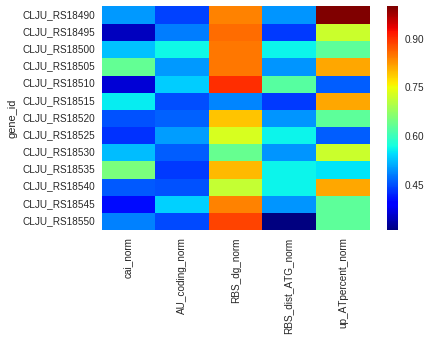

In [38]:
cg=sns.heatmap(my_df, cmap='jet')
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

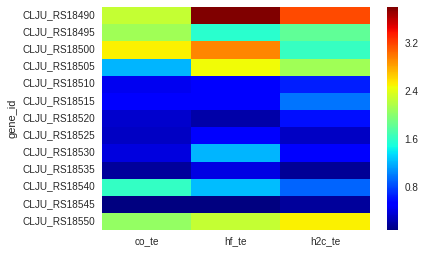

In [39]:
cg=sns.heatmap(my_tes, cmap='jet')
plt.show()

## cant see any relationship between TE and features for the WLP
##     
##     
##      
##       
##     


##     

In [15]:
c1=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c1')
c3=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c3')
c6=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c6')
c8=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c8')
c9=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c9')
c13=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c13')

c1a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c1a')
c2a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c2a')
c3a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c3a')
c4a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c4a')
c5a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c5a')
c6a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c6a')
c13a=pd.read_excel('/home/m/Dropbox/Clostridium_paper/groups_of_genes_based_on_UTR_features.xls', sheetname='c13a')

/home/m/anaconda2/lib/python2.7/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [16]:
c1 = pd.merge(c1, RBS_df)
c3 = pd.merge(c3, RBS_df)
c6 = pd.merge(c6, RBS_df)
c8 = pd.merge(c8, RBS_df)
c9 = pd.merge(c9, RBS_df)
c13 = pd.merge(c13, RBS_df)

c1a = pd.merge(c1a, RBS_df)
c2a = pd.merge(c2a, RBS_df)
c3a = pd.merge(c3a, RBS_df)
c4a = pd.merge(c4a, RBS_df)
c5a = pd.merge(c5a, RBS_df)
c6a = pd.merge(c6a, RBS_df)
c13a= pd.merge(c13a, RBS_df)


c9.to_excel('/home/m/Dropbox/Clostridium_paper/c9.xls')
c6.to_excel('/home/m/Dropbox/Clostridium_paper/c6.xls')

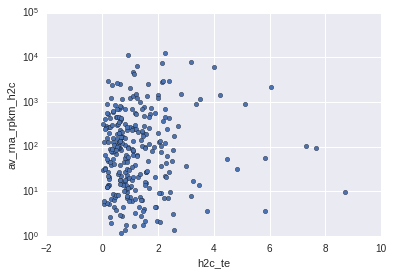

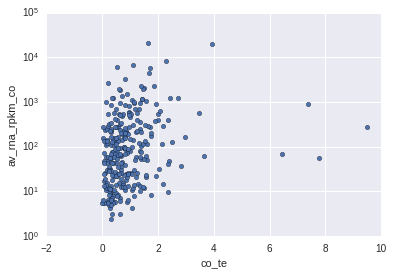

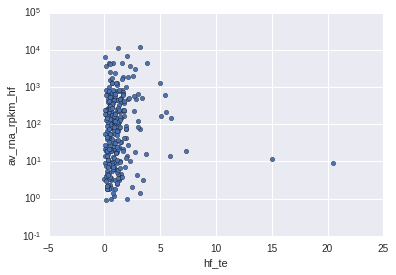

In [62]:
c9.plot.scatter('h2c_te','av_rna_rpkm_h2c')
plt.yscale('log')
c9.plot.scatter('co_te', 'av_rna_rpkm_co')
plt.yscale('log')
c9.plot.scatter('hf_te','av_rna_rpkm_hf')
plt.yscale('log')

In [18]:
mev=pd.read_csv('/home/m/Dropbox/Clostridium_paper/mRNA_features_for_TE_analysis.csv', sep='\t')

In [19]:
mev.head()

,Unnamed: 0,gene_id,cai,AU_coding,RBS_dg,RBS_dist_ATG,up_ATpercent,co_te,hf_te,h2c_te
0,0,CLJU_RS00005,0.156674,70.657797,-9.3,12,82,0.102286,0.180206,0.126133
1,1,CLJU_RS00010,0.133354,74.909420,-10.9,12,76,0.231835,0.955911,0.181714
2,2,CLJU_RS00015,0.146663,71.014493,-6.4,15,100,0.123482,0.242146,0.284338
3,3,CLJU_RS00020,0.134429,73.841962,-3.7,13,88,0.053735,0.058535,0.064549
4,4,CLJU_RS00025,0.158206,74.242424,-8.0,11,88,0.092833,0.099529,0.176607


In [20]:
best=RBS_df[(RBS_df.foldChange_co_hf_rna >1) ]

In [22]:
test=pd.merge(test,RBS_df)

NameError: name 'test' is not defined

(-1, 2)

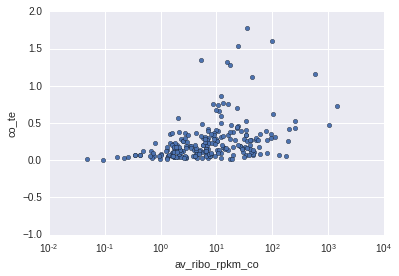

In [24]:
c4a.plot.scatter( 'av_ribo_rpkm_co','co_te')
plt.xscale('log')
plt.ylim(-1,2)

In [753]:
c6.replace([np.inf, -np.inf ],value=0, inplace=True)

In [775]:
c9 = c9[(c9.foldChange_co_hf_rna <0.5)]# & (c9.co_te < 20)]

In [777]:
c6 = c6[(c6.foldChange_co_hf_rna <0.5)]# & (c9.co_te < 20)]

In [769]:
len(c13)

8

In [768]:
c13 = c13[(c13.foldChange_co_hf_rna >1.5)]# & (c9.co_te < 20)]

In [807]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
X=c9.av_rna_rpkm_co
X=X.reshape(-1,1)
y=c9.co_te
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_predicted=reg.predict(X_test)


In [808]:
ss

0.56639770743908602

In [785]:
c9.to_excel('/home/m/Desktop/c9.xls')

0.4048509643483344

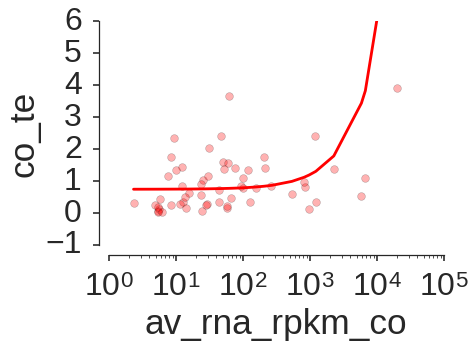

In [849]:
gg=c9
fig, ax= plt.subplots()
sns.set_style('ticks')
gg.plot.scatter('av_rna_rpkm_co', 'co_te', s=60, alpha=0.3, c='red', ax=ax)
ax.set_xscale('log')
x=(gg.av_rna_rpkm_co).sort_values()
y=(gg.co_te).sort_values()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), color='red')


#plt.yscale('log')
plt.ylim(-1,6)
#plt.xlim(-100,1e5)
sns.despine(offset=10)
gg.av_rna_rpkm_co.corr(gg.co_te, method='spearman')

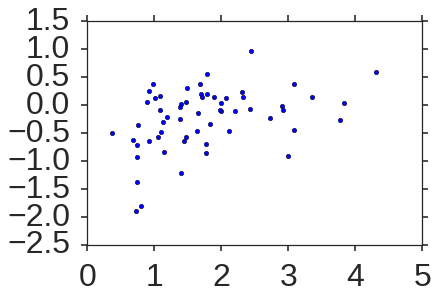

In [837]:
plt.scatter(x,y)

In [784]:
c6.to_excel('/home/m/Desktop/c6.xls')

0.016303753145858409

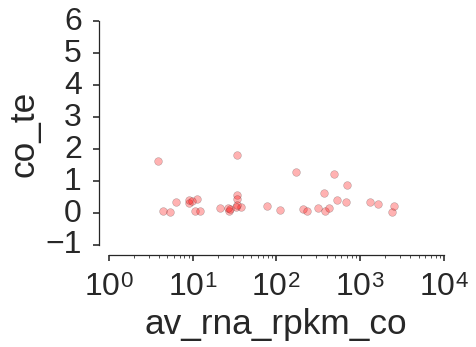

In [778]:
gg=c6
fig, ax= plt.subplots()
sns.set_style('ticks')
gg.plot.scatter('av_rna_rpkm_co', 'co_te', s=60, alpha=0.3, c='red', ax=ax)

plt.xscale('log')
#plt.yscale('log')
plt.ylim(-1,6)
#plt.xlim(-100,1e5)
sns.despine(offset=10)
gg.av_rna_rpkm_co.corr(gg.co_te, method='spearman')

0.19047619047619052

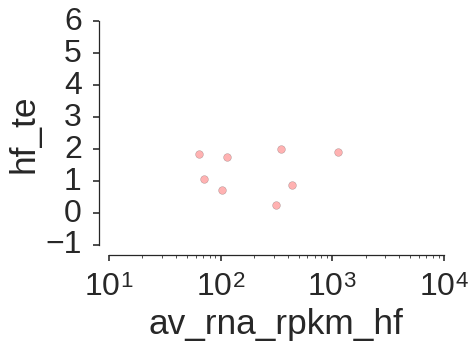

In [771]:
gg=c13
fig, ax= plt.subplots()
sns.set_style('ticks')
gg.plot.scatter('av_rna_rpkm_hf', 'hf_te', s=60, alpha=0.3, c='red', ax=ax)

plt.xscale('log')
#plt.yscale('log')
plt.ylim(-1,6)
#plt.xlim(-100,1e5)
sns.despine(offset=10)
gg.av_rna_rpkm_hf.corr(gg.hf_te, method='spearman')

In [25]:
RBS_df['log2COTE']=np.log2(RBS_df.co_te)
RBS_df['log2H2CTE']=np.log2(RBS_df.h2c_te)
RBS_df['log2HFTE']=np.log2(RBS_df.hf_te)

In [26]:
above1 = len(RBS_df[RBS_df.h2c_te>1])/ float(len(RBS_df[RBS_df.h2c_te<1]))*100
below1= 100-above1
print (above1, below1)

(30.75780089153046, 69.24219910846953)


/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log2


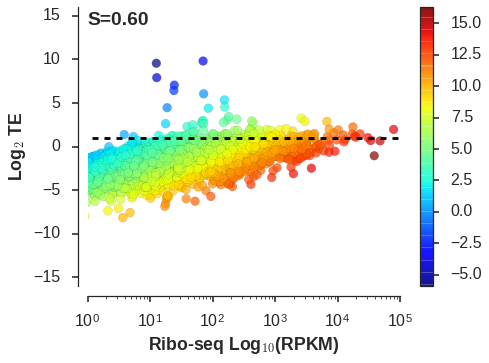

In [70]:
gg=RBS_df[RBS_df.av_ribo_rpkm_co>0]
fig, ax= plt.subplots(figsize=(7,5))
sns.set_context('poster')
sns.set_style('ticks')
cm = plt.cm.get_cmap('jet')
sc=ax.scatter(gg['av_ribo_rpkm_co'], gg['log2COTE'], s=80, alpha=0.7,
           cmap=cm, c=np.log2(gg.av_rna_rpkm_co), linewidth=0.1)

ax.set_xscale('log')
#plt.yscale('log')
ax.set_ylim(-16,16)
ax.set_xlim(1,1e5)
sns.despine(offset=10)

ax.set_ylabel('Log$_2$ TE', fontweight='bold' )
ax.set_xlabel('Ribo-seq Log$_{10}$(RPKM)', fontweight='bold')


cbar=fig.colorbar(sc, use_gridspec=True, )
ss=gg.av_ribo_rpkm_co.corr(gg.co_te, method='spearman')
ax.text(1, 14, 'S=%0.2f'%ss, fontweight='bold')
ax.hlines(1, 0,1e5, linestyles='dashed')

/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log2


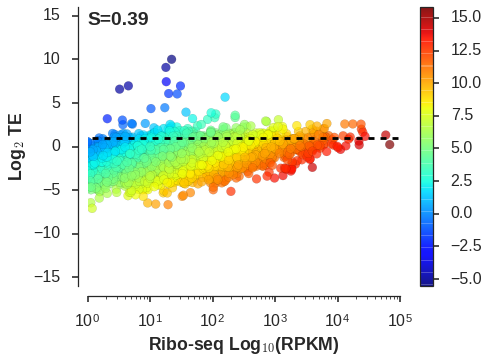

In [68]:
gg=RBS_df[RBS_df.av_ribo_rpkm_h2c>0]
fig, ax= plt.subplots(figsize=(7,5))
sns.set_style('ticks')
cm = plt.cm.get_cmap('jet')
sc=ax.scatter(gg['av_ribo_rpkm_h2c'], gg['log2H2CTE'], s=80, alpha=0.7,
           cmap=cm, c=np.log2(gg.av_rna_rpkm_h2c), linewidth=0.1)

ax.set_xscale('log')
#plt.yscale('log')
ax.set_ylim(-16,16)
ax.set_xlim(1,1e5)
sns.despine(offset=10)

ax.set_ylabel('Log$_2$ TE', fontweight='bold')
ax.set_xlabel('Ribo-seq Log$_{10}$(RPKM)', fontweight='bold')


cbar=fig.colorbar(sc, use_gridspec=True, )
ss=gg.av_ribo_rpkm_h2c.corr(gg.h2c_te, method='spearman')
ax.text(1, 14, 'S=%0.2f'%ss, fontweight='bold')
ax.hlines(1, 0,1e5, linestyles='dashed')

/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log2


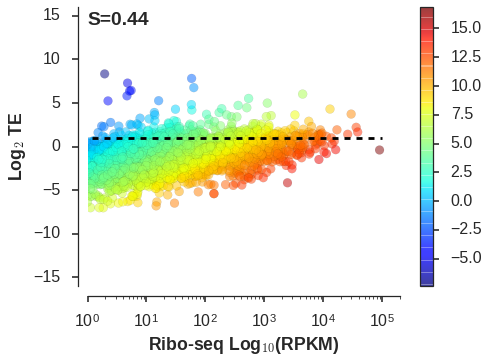

In [69]:
gg=RBS_df[RBS_df.av_ribo_rpkm_hf>0]
fig, ax= plt.subplots(figsize=(7,5))
sns.set_style('ticks')
cm = plt.cm.get_cmap('jet')
sc=ax.scatter(gg['av_ribo_rpkm_hf'], gg['log2HFTE'], s=80, alpha=0.5,
           cmap=cm, c=(np.log2(gg.av_rna_rpkm_hf)), linewidth=0.1)

ax.set_xscale('log')
#plt.yscale('log')
ax.set_ylim(-16,16)
ax.set_xlim(1,2e5)
sns.despine(offset=10)

ax.set_ylabel('Log$_2$ TE', fontweight='bold')
ax.set_xlabel('Ribo-seq Log$_{10}$(RPKM)', fontweight='bold')

cbar=fig.colorbar(sc, use_gridspec=True, )
ss=gg.av_ribo_rpkm_hf.corr(gg.hf_te, method='spearman')
ax.text(1, 14, 'S=%0.2f'%ss, fontweight='bold')
ax.hlines(1, 0,1e5, linestyles='dashed')


In [1068]:
RBS_df.columns

Index([                   u'gene_id',                  u'RBS_start',
                          u'RBS_end',                     u'RBS_dg',
                          u'RBS_seq',                    u'product',
                           u'strand',                      u'start',
                             u'stop',                    u'real_st',
                          u'real_sp',               u'RBS_dist_ATG',
                               u'id',      u'foldChange_co_hf_ribo',
        u'log2FoldChange_co_hf_ribo',            u'padj_co_hf_ribo',
           u'foldChange_co_h2c_ribo', u'log2FoldChange_co_h2c_ribo',
                 u'padj_co_h2c_ribo',     u'foldChange_hf_h2c_ribo',
       u'log2FoldChange_hf_h2c_ribo',           u'padj_hf_h2c_ribo',
             u'foldChange_co_hf_rna',   u'log2FoldChange_co_hf_rna',
                   u'padj_co_hf_rna',      u'foldChange_co_h2c_rna',
        u'log2FoldChange_co_h2c_rna',            u'padj_co_h2c_rna',
            u'foldChange_hf_h2c_rn

In [27]:
RBS_df['log2COTE_HFTE']=np.log2(RBS_df.co_te / (RBS_df.hf_te))
RBS_df['log2CORNA_HFRNA']=np.log2(RBS_df.av_rna_rpkm_co / (RBS_df.av_rna_rpkm_hf))
RBS_df['log2H2CTE_HFTE']=np.log2(RBS_df.h2c_te / (RBS_df.hf_te))
RBS_df['log2H2CRNA_HFRNA']=np.log2(RBS_df.av_rna_rpkm_h2c / (RBS_df.av_rna_rpkm_hf))


/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
/home/m/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log2


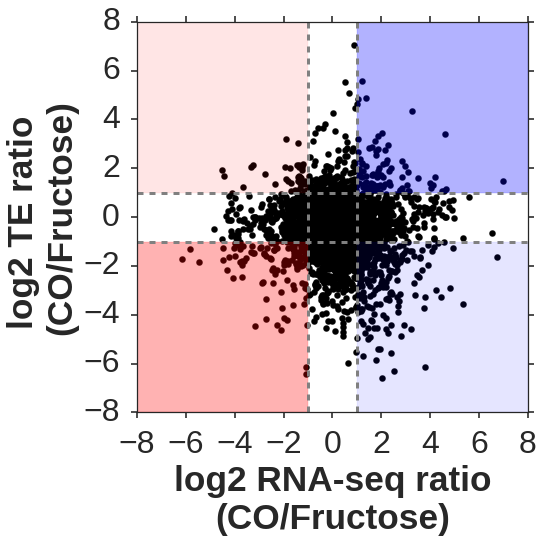

In [27]:
gg=RBS_df
fig, ax= plt.subplots(figsize=(7,7))
sns.set_style('ticks')
sns.set_context('poster', font_scale=2)
sc=ax.scatter(gg['log2CORNA_HFRNA'], gg['log2COTE_HFTE'], s=40, alpha=1,linewidth=0.15, color='black')
ax.set_ylim(-8,8)
ax.set_xlim(-8,8)
ax.hlines(1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.hlines(-1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.vlines(1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.vlines(-1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.fill_between((1,8), 1,8, color='blue', alpha=0.3)
ax.fill_between((-8,-1),-8, -1, color='red', alpha=0.3)
ax.fill_between((1,8), -8,-1, color='blue', alpha=0.1)
ax.fill_between((-8,-1),1,8, color='red', alpha=0.1)
ax.set_ylabel('log2 TE ratio \n(CO/Fructose)', fontweight='bold')
ax.set_xlabel('log2 RNA-seq ratio\n(CO/Fructose)', fontweight='bold')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/low_and_high_TE_groups_hf_vs_co.pdf',
           bbox_inches='tight')

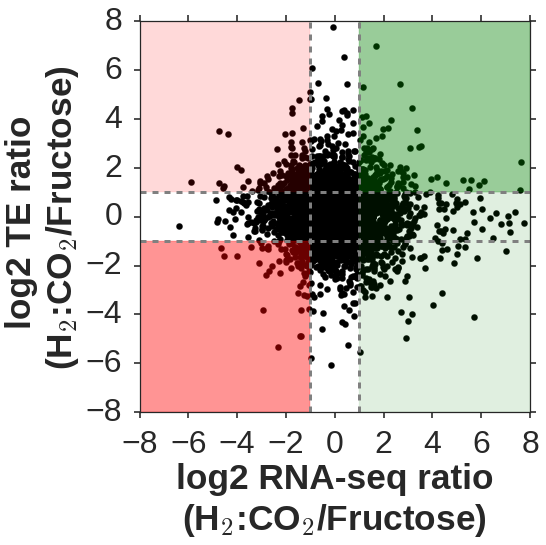

In [33]:
gg=RBS_df
fig, ax= plt.subplots(figsize=(7,7))
sns.set_style('ticks')
sns.set_context('poster',font_scale=2)

sc=ax.scatter(gg['log2H2CRNA_HFRNA'], gg['log2H2CTE_HFTE'], s=40, alpha=1,linewidth=0.15, color='black')
ax.set_ylim(-8,8)
ax.set_xlim(-8,8)
ax.hlines(1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.hlines(-1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.vlines(1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.vlines(-1,-8,8, linestyles='dashed', linewidth=3, color='grey')
ax.fill_between((1,8), 1,8, color='green', alpha=0.4)
ax.fill_between((-8,-1),-8, -1, color='red', alpha=0.42)
ax.fill_between((1,8), -8,1, color='green', alpha=0.12)
ax.fill_between((-8,-1),1,8, color='red', alpha=0.15)
ax.set_ylabel('log2 TE ratio \n(H$_2$:CO$_2$/Fructose)', fontweight='bold')
ax.set_xlabel('log2 RNA-seq ratio\n(H$_2$:CO$_2$/Fructose)', fontweight='bold')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/low_and_high_TE_groups_hf_vs_h2c.pdf',
           bbox_inches='tight')

In [1259]:
len(no_change)

497

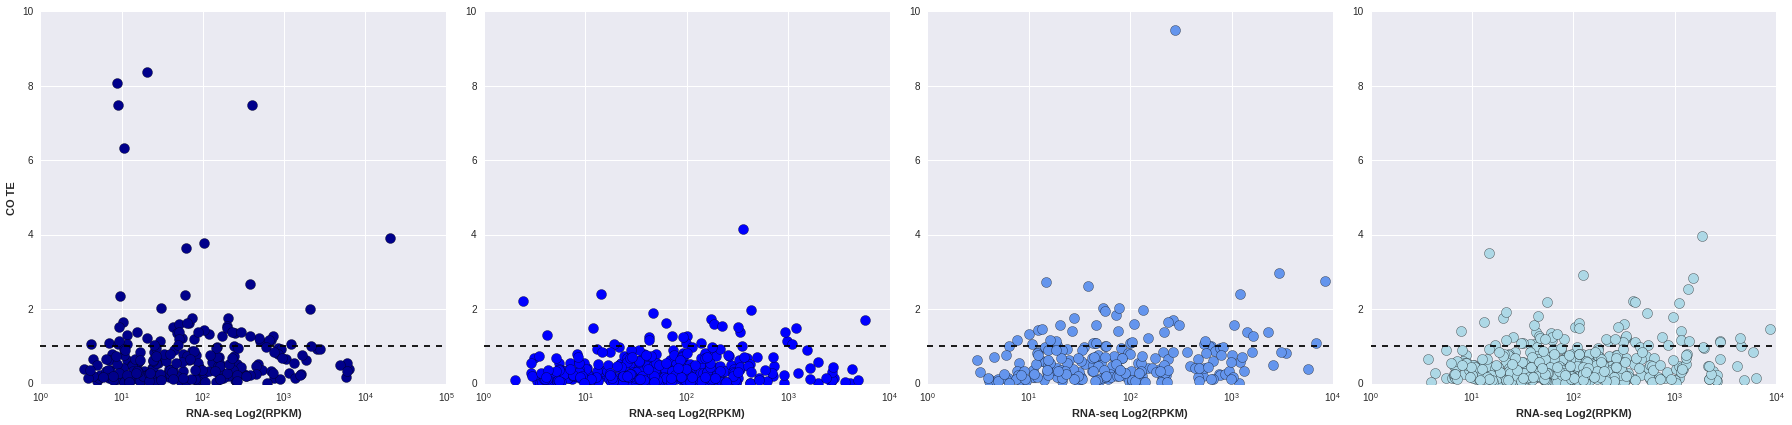

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(25,6), ncols=4, nrows=1)
co_aut_hi = RBS_df[(RBS_df.log2COTE_HFTE>0.5) & (RBS_df.log2CORNA_HFRNA>0.5) ]
co_aut_non= RBS_df[(RBS_df.log2COTE_HFTE<0.5) & (RBS_df.log2COTE_HFTE>-0.5) & 
                  (RBS_df.log2CORNA_HFRNA >1)]
co_aut_lo = RBS_df[(RBS_df.log2COTE_HFTE<-0.5) & (RBS_df.log2CORNA_HFRNA<-0.5)]
no_change= RBS_df[(RBS_df.log2COTE_HFTE<0.5) & (RBS_df.log2COTE_HFTE> -0.5)&
                 (RBS_df.log2CORNA_HFRNA<0.5) & (RBS_df.log2CORNA_HFRNA>-0.5)]
co_aut_hi.plot.scatter('av_rna_rpkm_co', 'co_te', ax=ax1, s=100, c='darkblue')
ax1.set_xscale('log')
ax1.set_ylabel('CO TE', fontweight='bold')
ax1.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax1.set_ylim(0,10)
ax1.set_xlim(1,100000)
ax1.hlines(1, 0,100000, linestyles='dashed')
co_aut_lo.plot.scatter('av_rna_rpkm_co', 'co_te', ax=ax2, s=100, c='blue')
ax2.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax2.set_xscale('log')
ax2.set_ylim(0,10)
ax2.set_xlim(1,10000)
ax2.hlines(1, 0,10000, linestyles='dashed')
ax2.set_ylabel('')
co_aut_non.plot.scatter('av_rna_rpkm_co', 'co_te', ax=ax3, s=100, c='cornflowerblue')
ax3.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax3.set_xscale('log')
ax3.set_ylim(0,10)
ax3.set_xlim(1,10000)
ax3.hlines(1, 0,10000, linestyles='dashed')
ax3.set_ylabel('')

no_change.plot.scatter('av_rna_rpkm_co', 'co_te', ax=ax4, s=100, c='lightblue')
ax4.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax4.set_xscale('log')
ax4.set_ylim(0,10)
ax4.set_xlim(1,10000)
ax4.hlines(1, 0,10000, linestyles='dashed')
ax4.set_ylabel('')

plt.tight_layout()


In [29]:
from scipy import stats

In [32]:
##RBS
print stats.mannwhitneyu(co_aut_hi.RBS_dg, co_aut_lo.RBS_dg)[1]
print stats.mannwhitneyu(co_aut_hi.RBS_dg, no_change.RBS_dg)[1]
print stats.mannwhitneyu(co_aut_hi.RBS_dg, co_aut_non.RBS_dg)[1]
print '-------------------'
print stats.mannwhitneyu(co_aut_hi.cai, co_aut_lo.cai)[1]
print stats.mannwhitneyu(co_aut_hi.cai, no_change.cai)[1]
print stats.mannwhitneyu(co_aut_hi.cai, co_aut_non.cai)[1]
print '-------------------'
print stats.mannwhitneyu(co_aut_hi.AU_coding, co_aut_lo.AU_coding)[1]
print stats.mannwhitneyu(co_aut_hi.AU_coding, no_change.AU_coding)[1]
print stats.mannwhitneyu(co_aut_hi.AU_coding, co_aut_non.AU_coding)[1]
print '-------------------'
print stats.mannwhitneyu(co_aut_hi.up_ATpercent, co_aut_lo.up_ATpercent)[1]
print stats.mannwhitneyu(co_aut_hi.up_ATpercent, no_change.up_ATpercent)[1]
print stats.mannwhitneyu(co_aut_hi.up_ATpercent, co_aut_non.up_ATpercent)[1]
print '-------------------'
print stats.mannwhitneyu(co_aut_hi.RBS_dist_ATG, co_aut_lo.RBS_dist_ATG)[1]
print stats.mannwhitneyu(co_aut_hi.RBS_dist_ATG, no_change.RBS_dist_ATG)[1]
print stats.mannwhitneyu(co_aut_hi.RBS_dist_ATG, co_aut_non.RBS_dist_ATG)[1]
print '-------------------'
print stats.mannwhitneyu(co_aut_hi.av_ribo_rpkm_co, co_aut_lo.av_ribo_rpkm_co)[1]
print stats.mannwhitneyu(co_aut_hi.av_ribo_rpkm_co, no_change.av_ribo_rpkm_co)[1]
print stats.mannwhitneyu(co_aut_hi.av_ribo_rpkm_co, co_aut_non.av_ribo_rpkm_co)[1]

4.92203797192e-05
0.00334486257364
0.468967432233
-------------------
0.00242310085703
0.000220998388405
0.180493082498
-------------------
7.95391622691e-05
0.00242325237159
0.189172961621
-------------------
0.232229091776
0.39645507543
0.00484289604151
-------------------
0.0215638613919
0.114070525558
0.164747873972
-------------------
1.24626288692e-06
0.388930686043
0.484612956636


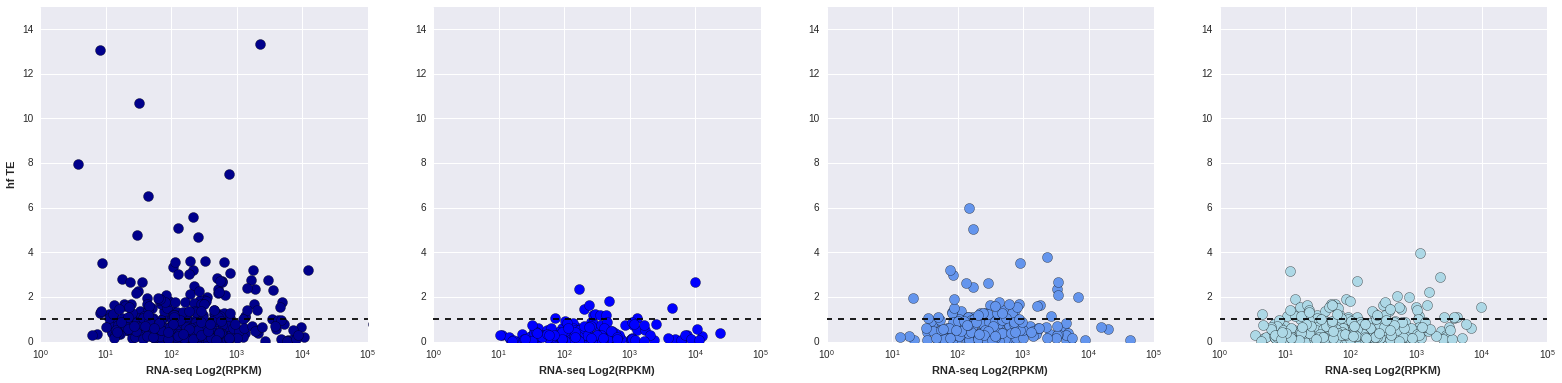

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(27,6), ncols=4, nrows=1)
hf_aut_hi = RBS_df[(RBS_df.log2COTE_HFTE<-0.5) & (RBS_df.log2CORNA_HFRNA<-0.5) ]
hf_aut_non= RBS_df[(RBS_df.log2COTE_HFTE<0.5) & (RBS_df.log2COTE_HFTE>-0.5) & 
                  (RBS_df.log2CORNA_HFRNA <-1)]
hf_aut_lo = RBS_df[(RBS_df.log2COTE_HFTE>0.5) & (RBS_df.log2CORNA_HFRNA<-0.5)]

hf_aut_hi.plot.scatter('av_rna_rpkm_hf', 'hf_te', ax=ax1, s=100, c='darkblue')
ax1.set_xscale('log')
ax1.set_ylabel('hf TE', fontweight='bold')
ax1.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax1.set_ylim(0,15)
ax1.set_xlim(1,100000)
ax1.hlines(1, 0,100000, linestyles='dashed')
hf_aut_lo.plot.scatter('av_rna_rpkm_hf', 'hf_te', ax=ax2, s=100, c='blue')
ax2.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax2.set_xscale('log')
ax2.set_ylim(0,15)
ax2.set_xlim(1,100000)
ax2.hlines(1, 0,100000, linestyles='dashed')
ax2.set_ylabel('')
hf_aut_non.plot.scatter('av_rna_rpkm_hf', 'hf_te', ax=ax3, s=100, c='cornflowerblue')
ax3.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax3.set_xscale('log')
ax3.set_ylim(0,15)
ax3.set_xlim(1,100000)
ax3.hlines(1, 0,100000, linestyles='dashed')
ax3.set_ylabel('')

no_change.plot.scatter('av_rna_rpkm_hf', 'hf_te', ax=ax4, s=100, c='lightblue')
ax4.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax4.set_xscale('log')
ax4.set_ylim(0,15)
ax4.set_xlim(1,100000)
ax4.hlines(1, 0,100000, linestyles='dashed')
ax4.set_ylabel('')

#plt.tight_layout()

In [34]:
print stats.mannwhitneyu(hf_aut_hi.RBS_dg, hf_aut_lo.RBS_dg)[1]
print stats.mannwhitneyu(hf_aut_hi.RBS_dg, no_change.RBS_dg)[1]
print stats.mannwhitneyu(hf_aut_hi.RBS_dg, hf_aut_non.RBS_dg)[1]
print '-------------------'
print stats.mannwhitneyu(hf_aut_hi.cai, hf_aut_lo.cai)[1]
print stats.mannwhitneyu(hf_aut_hi.cai, no_change.cai)[1]
print stats.mannwhitneyu(hf_aut_hi.cai, hf_aut_non.cai)[1]
print '-------------------'
print stats.mannwhitneyu(hf_aut_hi.AU_coding, hf_aut_lo.AU_coding)[1]
print stats.mannwhitneyu(hf_aut_hi.AU_coding, no_change.AU_coding)[1]
print stats.mannwhitneyu(hf_aut_hi.AU_coding, hf_aut_non.AU_coding)[1]
print '-------------------'
print stats.mannwhitneyu(hf_aut_hi.up_ATpercent, hf_aut_lo.up_ATpercent)[1]
print stats.mannwhitneyu(hf_aut_hi.up_ATpercent, no_change.up_ATpercent)[1]
print stats.mannwhitneyu(hf_aut_hi.up_ATpercent, hf_aut_non.up_ATpercent)[1]
print '-------------------'
print stats.mannwhitneyu(hf_aut_hi.RBS_dist_ATG, hf_aut_lo.RBS_dist_ATG)[1]
print stats.mannwhitneyu(hf_aut_hi.RBS_dist_ATG, no_change.RBS_dist_ATG)[1]
print stats.mannwhitneyu(hf_aut_hi.RBS_dist_ATG, hf_aut_non.RBS_dist_ATG)[1]
print '-------------------'
print stats.mannwhitneyu(hf_aut_hi.av_ribo_rpkm_hf, hf_aut_lo.av_ribo_rpkm_hf)[1]
print stats.mannwhitneyu(hf_aut_hi.av_ribo_rpkm_hf, no_change.av_ribo_rpkm_hf)[1]
print stats.mannwhitneyu(hf_aut_hi.av_ribo_rpkm_hf, hf_aut_non.av_ribo_rpkm_hf)[1]

0.000259305641186
0.086931005196
0.00508309415558
-------------------
0.00265032956219
0.241510473583
0.158573065926
-------------------
0.431451974333
0.0947058879226
0.292280913676
-------------------
0.169507968989
0.26703720932
0.303261251413
-------------------
0.0335588873097
0.159953017256
0.0650240693305
-------------------
0.00036090370685
2.51683327913e-15
9.91939867977e-05


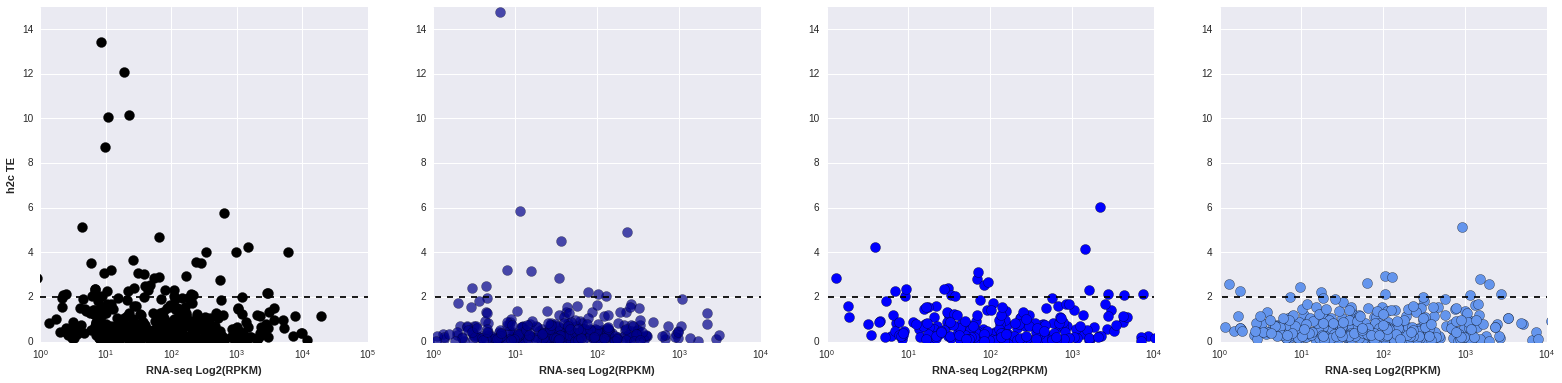

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(27,6), ncols=4, nrows=1)
h2c_aut_hi = RBS_df[(RBS_df.log2H2CTE_HFTE>0.5) & (RBS_df.log2H2CRNA_HFRNA>0.5) ]
h2c_aut_non= RBS_df[(RBS_df.log2H2CTE_HFTE<0.5) & (RBS_df.log2H2CTE_HFTE>-0.5) & 
                  (RBS_df.log2H2CRNA_HFRNA >1)]
h2c_aut_lo = RBS_df[(RBS_df.log2H2CTE_HFTE<-0.5) & (RBS_df.log2H2CRNA_HFRNA<-0.5)]
no_change= RBS_df[(RBS_df.log2H2CTE_HFTE<0.5) & (RBS_df.log2H2CTE_HFTE> -0.5)&
                 (RBS_df.log2H2CRNA_HFRNA<0.5) & (RBS_df.log2H2CRNA_HFRNA>-0.5)]
h2c_aut_hi.plot.scatter('av_rna_rpkm_h2c', 'h2c_te', ax=ax1, s=100, c='black')
ax1.set_xscale('log')
ax1.set_ylabel('h2c TE', fontweight='bold')
ax1.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax1.set_ylim(0,15)
ax1.set_xlim(1,100000)
ax1.hlines(2, 0,100000, linestyles='dashed')
h2c_aut_lo.plot.scatter('av_rna_rpkm_h2c', 'h2c_te', ax=ax2, s=100, c='darkblue',alpha=0.7 )
ax2.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax2.set_xscale('log')
ax2.set_ylim(0,15)
ax2.set_xlim(1,10000)
ax2.hlines(2, 0,10000, linestyles='dashed')
ax2.set_ylabel('')
h2c_aut_non.plot.scatter('av_rna_rpkm_h2c', 'h2c_te', ax=ax3, s=100, c='blue', )
ax3.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax3.set_xscale('log')
ax3.set_ylim(0,15)
ax3.set_xlim(1,10000)
ax3.hlines(2, 0,10000, linestyles='dashed')
ax3.set_ylabel('')

no_change.plot.scatter('av_rna_rpkm_h2c', 'h2c_te', ax=ax4, s=100, c='cornflowerblue',)
ax4.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax4.set_xscale('log')
ax4.set_ylim(0,15)
ax4.set_xlim(1,10000)
ax4.hlines(2, 0,10000, linestyles='dashed')
ax4.set_ylabel('')

#plt.tight_layout()


In [36]:
print stats.mannwhitneyu(h2c_aut_hi.RBS_dg, h2c_aut_lo.RBS_dg)[1]
print stats.mannwhitneyu(h2c_aut_hi.RBS_dg, no_change.RBS_dg)[1]
print stats.mannwhitneyu(h2c_aut_hi.RBS_dg, h2c_aut_non.RBS_dg)[1]
print '-------------------'
print stats.mannwhitneyu(h2c_aut_hi.cai, h2c_aut_lo.cai)[1]
print stats.mannwhitneyu(h2c_aut_hi.cai, no_change.cai)[1]
print stats.mannwhitneyu(h2c_aut_hi.cai, h2c_aut_non.cai)[1]
print '-------------------'
print stats.mannwhitneyu(h2c_aut_hi.AU_coding, h2c_aut_lo.AU_coding)[1]
print stats.mannwhitneyu(h2c_aut_hi.AU_coding, no_change.AU_coding)[1]
print stats.mannwhitneyu(h2c_aut_hi.AU_coding, h2c_aut_non.AU_coding)[1]
print '-------------------'
print stats.mannwhitneyu(h2c_aut_hi.up_ATpercent, h2c_aut_lo.up_ATpercent)[1]
print stats.mannwhitneyu(h2c_aut_hi.up_ATpercent, no_change.up_ATpercent)[1]
print stats.mannwhitneyu(h2c_aut_hi.up_ATpercent, h2c_aut_non.up_ATpercent)[1]
print '-------------------'
print stats.mannwhitneyu(h2c_aut_hi.RBS_dist_ATG, h2c_aut_lo.RBS_dist_ATG)[1]
print stats.mannwhitneyu(h2c_aut_hi.RBS_dist_ATG, no_change.RBS_dist_ATG)[1]
print stats.mannwhitneyu(h2c_aut_hi.RBS_dist_ATG, h2c_aut_non.RBS_dist_ATG)[1]
print '-------------------'
print stats.mannwhitneyu(h2c_aut_hi.av_ribo_rpkm_hf, h2c_aut_lo.av_ribo_rpkm_hf)[1]
print stats.mannwhitneyu(h2c_aut_hi.av_ribo_rpkm_hf, no_change.av_ribo_rpkm_hf)[1]
print stats.mannwhitneyu(h2c_aut_hi.av_ribo_rpkm_hf, h2c_aut_non.av_ribo_rpkm_hf)[1]

0.142148956686
0.245966856954
0.23152822838
-------------------
0.161003311432
0.281481811615
0.0420115489601
-------------------
0.0138679468691
0.0135760181118
0.433122116108
-------------------
0.100232576595
0.0990916364653
0.316524160189
-------------------
0.209781480549
0.100949783544
0.191848224225
-------------------
4.07211927221e-43
3.02099316514e-26
2.01253151006e-06


## Conclusion: doing it the by different groups only makes sence for CO. the H2:CO2 didn't make sense at all. Hence, will stick with initial analysis using the 80th and 20th percentiles

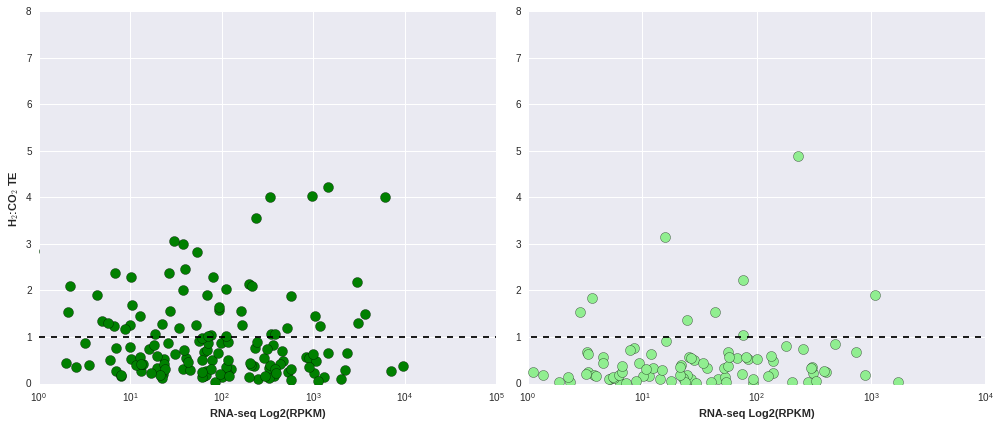

In [37]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2, nrows=1)
h2c_aut_hi = RBS_df[(RBS_df.log2H2CTE_HFTE>1) & (RBS_df.log2H2CRNA_HFRNA>1) ]
h2c_aut_lo = RBS_df[(RBS_df.log2H2CTE_HFTE<-1) & (RBS_df.log2H2CRNA_HFRNA<-1)]
h2c_aut_hi.plot.scatter('av_rna_rpkm_h2c', 'h2c_te', ax=ax1, s=100, c='green')
ax1.set_xscale('log')
ax1.set_ylabel('H$_2$:CO$_2$ TE', fontweight='bold')
ax1.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax1.set_ylim(0,8)
ax1.set_xlim(1,100000)

h2c_aut_lo.plot.scatter('av_rna_rpkm_h2c', 'h2c_te', ax=ax2, s=100, c='lightgreen')
ax2.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax2.set_xscale('log')
ax2.set_ylim(0,8)
ax2.set_xlim(1,10000)
ax2.hlines(1, 0,10000, linestyles='dashed')
ax1.hlines(1, 0,100000, linestyles='dashed')

ax2.set_ylabel('')
plt.tight_layout()


0.526454000179
0.440683642161


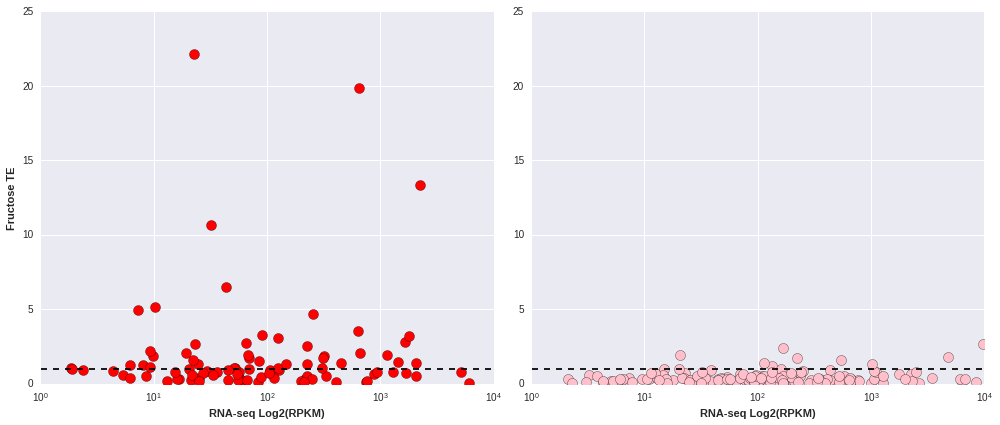

In [38]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2, nrows=1)
hf_het_hi = RBS_df[(RBS_df.log2H2CTE_HFTE<-1) & (RBS_df.log2H2CRNA_HFRNA<-1) ]
hf_het_lo = RBS_df[(RBS_df.log2H2CTE_HFTE>1) & (RBS_df.log2H2CRNA_HFRNA<-1)]
hf_het_hi.plot.scatter('av_rna_rpkm_hf', 'hf_te', ax=ax1, s=100, c='red')
ax1.set_xscale('log')
ax1.set_ylabel('Fructose TE', fontweight='bold')
ax1.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax1.set_ylim(0,25)
ax1.set_xlim(1,10000)
print hf_het_hi.av_ribo_rpkm_hf.corr(hf_het_hi.hf_te, method='spearman')
hf_het_lo.plot.scatter('av_rna_rpkm_hf', 'hf_te', ax=ax2, s=100, c='pink')
ax2.set_xlabel('RNA-seq Log2(RPKM)', fontweight='bold')
ax2.set_xscale('log')
ax2.set_ylim(0,25)
ax2.set_xlim(1,10000)
ax2.hlines(1, 0,10000, linestyles='dashed')
ax1.hlines(1, 0,100000, linestyles='dashed')
ax2.set_ylabel('')
print hf_het_lo.av_ribo_rpkm_hf.corr(hf_het_lo.hf_te, method='spearman')
plt.tight_layout()

0.555753358974
0.229149797571


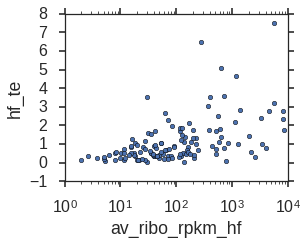

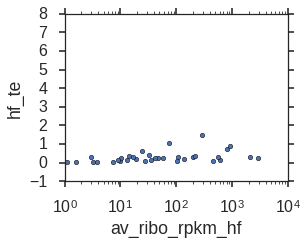

In [1171]:
hf_het_hi_co = RBS_df[(RBS_df.log2COTE_HFTE<-1) & (RBS_df.log2CORNA_HFRNA<-1) ]
hf_het_lo_co = RBS_df[(RBS_df.log2COTE_HFTE>1) & (RBS_df.log2CORNA_HFRNA<-1)]
hf_het_hi_co.plot.scatter('av_ribo_rpkm_hf', 'hf_te', figsize=(4,3))
plt.xscale('log')
plt.ylim(-1,8)
print hf_het_hi_co.av_ribo_rpkm_hf.corr(hf_het_hi_co.hf_te, method='spearman')
hf_het_lo_co.plot.scatter('av_ribo_rpkm_hf', 'hf_te', figsize=(4,3))
plt.xscale('log')
plt.ylim(-1,8)
print hf_het_lo_co.av_ribo_rpkm_hf.corr(hf_het_lo_co.hf_te, method='spearman')

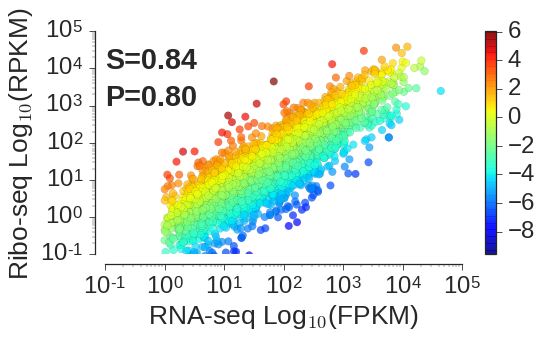

In [1064]:
gg=RBS_df[RBS_df.av_rna_rpkm_hf>1]
fig, ax= plt.subplots(figsize=(8,4))
sns.set_style('ticks')
cm = plt.cm.get_cmap('jet')
sc=ax.scatter(gg['av_rna_rpkm_hf'], gg['av_ribo_rpkm_hf'], s=60, alpha=0.7,
           cmap=cm, c=np.log2(gg.hf_te), linewidth=0.1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1,1e5)
ax.set_xlim(0.1,1e5)
sns.despine(offset=10)

ax.set_ylabel('Ribo-seq Log$_{10}$(RPKM)')
ax.set_xlabel('RNA-seq Log$_{10}$(FPKM)')

cbar=fig.colorbar(sc, use_gridspec=True, )
SS=gg.av_ribo_rpkm_hf.corr(gg.av_rna_rpkm_hf, method='spearman')
PP=gg.av_ribo_rpkm_hf.corr(gg.av_rna_rpkm_hf, method='pearson')
ax.text(0.1, 1e4,'S=%.2f'%SS, fontweight = 'bold')
ax.text(0.1, 1e3,'P=%.2f'%PP, fontweight='bold')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/hf_Ribo_RNA_correlation.pdf',
           bbox_inches='tight')

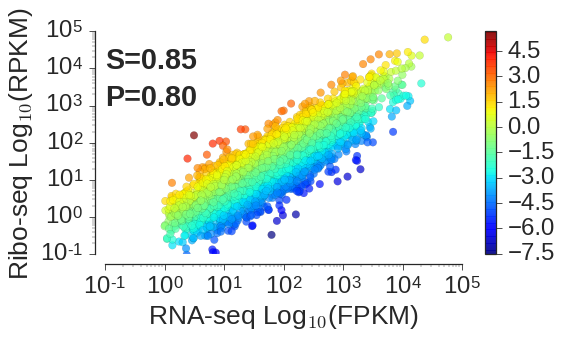

In [1065]:
gg=RBS_df[RBS_df.av_rna_rpkm_h2c>1]
fig, ax= plt.subplots(figsize=(8,4))
sns.set_style('ticks')
cm = plt.cm.get_cmap('jet')
sc=ax.scatter(gg['av_rna_rpkm_h2c'], gg['av_ribo_rpkm_h2c'], s=60, alpha=0.7,
           cmap=cm, c=np.log2(gg.h2c_te), linewidth=0.1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1,1e5)
ax.set_xlim(0.1,1e5)
sns.despine(offset=10)

ax.set_ylabel('Ribo-seq Log$_{10}$(RPKM)')
ax.set_xlabel('RNA-seq Log$_{10}$(FPKM)')
cbar=fig.colorbar(sc, use_gridspec=True, )

SS=gg.av_ribo_rpkm_h2c.corr(gg.av_rna_rpkm_h2c, method='spearman')
PP=gg.av_ribo_rpkm_h2c.corr(gg.av_rna_rpkm_h2c, method='pearson')
ax.text(0.1, 1e4,'S=%.2f'%SS, fontweight = 'bold')
ax.text(0.1, 1e3,'P=%.2f'%PP, fontweight='bold')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/h2c_Ribo_RNA_correlation.pdf',
           bbox_inches='tight')

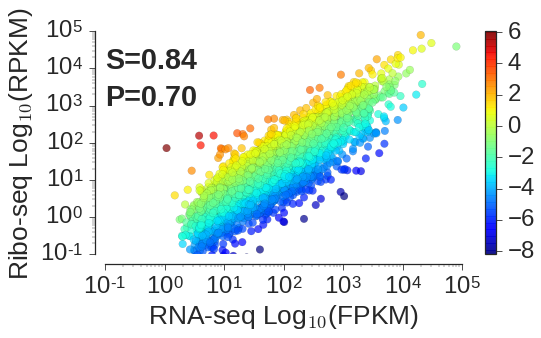

In [1066]:
gg=RBS_df[RBS_df.av_rna_rpkm_co>1]
fig, ax= plt.subplots(figsize=(8,4))
sns.set_style('ticks')
cm = plt.cm.get_cmap('jet')
sc=ax.scatter(gg['av_rna_rpkm_co'], gg['av_ribo_rpkm_co'], s=60, alpha=0.7,
           cmap=cm, c=np.log2(gg.co_te), linewidth=0.1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1,1e5)
ax.set_xlim(0.1,1e5)
sns.despine(offset=10)

ax.set_ylabel('Ribo-seq Log$_{10}$(RPKM)')
ax.set_xlabel('RNA-seq Log$_{10}$(FPKM)')
cbar=fig.colorbar(sc, use_gridspec=True, )

SS=gg.av_ribo_rpkm_co.corr(gg.av_rna_rpkm_co, method='spearman')
PP=gg.av_ribo_rpkm_co.corr(gg.av_rna_rpkm_co, method='pearson')
ax.text(0.1, 1e4,'S=%.2f'%SS, fontweight = 'bold')
ax.text(0.1, 1e3,'P=%.2f'%PP, fontweight='bold')
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/co_Ribo_RNA_correlation.pdf',
           bbox_inches='tight')

In [44]:
rast = pd.read_excel('/home/m/Dropbox/Clostridium_paper/Rast_merged_with_Omics.xls')

In [208]:
pathways=rast[(rast.av_ribo_rpkm_co>10) & (rast.av_ribo_rpkm_h2c>10) & (rast.av_ribo_rpkm_hf>5)]

#pathways=pd.merge(pathways, RBS_df)
pathways.Subsystem=pathways.Subsystem.str.replace('Flagellum in Campylobacter', 'Flagellum')
pathways=pathways.dropna(subset=['Subsystem'], how='all')

pathways.loc[:,'co_hf_log']=np.log2(pathways.av_rna_rpkm_co / pathways.av_rna_rpkm_hf)
pathways.loc[:,'co_te_log']=np.log2(pathways.co_te)
pathways.loc[:,'hf_te_log']=np.log2(pathways.hf_te)

In [252]:
len(pathways)

1043

In [210]:
subsys=pathways.groupby('Subsystem')['Subsystem'].count().to_frame(name='subsystem_count').reset_index()

In [211]:
pathways = pd.merge(pathways,subsys, on='Subsystem')

In [220]:

##try percentiles as cutoff since it's clearner and easier to explain, 
co = pathways[(pathways.co_te > np.percentile(pathways.co_te, 80)) & (pathways.co_hf_log >=0.585)]
hfc = pathways[(pathways.hf_te >np.percentile(pathways.hf_te, 80))& (pathways.co_hf_log <=-0.585)]
co_lote=pathways[(pathways.co_te < np.percentile(pathways.co_te,20)) & (pathways.co_hf_log >=0.585)]
hfc_lote= pathways[(pathways.hf_te <np.percentile(pathways.hf_te,20)) & (pathways.co_hf_log <=-0.585)]

In [221]:
len(co)

50

(-8, 8)

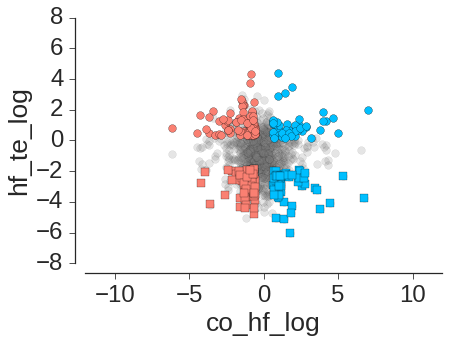

In [222]:
fig, ax = plt.subplots()
sns.set_style('ticks')
sns.despine(offset=10)
sns.set_context('paper', font_scale=3)
pathways.plot.scatter('co_hf_log','co_te_log',ax=ax , color='grey', alpha=0.2, s=60)
co.plot.scatter('co_hf_log', 'co_te_log', ax= ax, color='deepskyblue', s=60)
hfc.plot.scatter('co_hf_log', 'hf_te_log', ax=ax, color='salmon', s=60)
co_lote.plot.scatter('co_hf_log', 'co_te_log', ax=ax, color='deepskyblue', s=60, marker='s')
hfc_lote.plot.scatter('co_hf_log', 'hf_te_log', ax=ax, color= 'salmon', s=60, marker ='s')
plt.xlim(-12,12)
plt.ylim(-8,8)
#plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/log2CO_HFratio_mRNA_vs_co_hf_TE_and_lows.pdf',
#           bbox_inches='tight')


In [223]:
pathways.loc[:,'h2c_hf']=np.log2(pathways.av_rna_rpkm_h2c / pathways.av_rna_rpkm_hf)
pathways.loc[:,'h2c_te_log']=np.log2(pathways.h2c_te)


h2c= pathways[(pathways.h2c_te > np.percentile(pathways.h2c_te,80))]# & (pathways.h2c_hf >=0.585)]
hfh = pathways[(pathways.hf_te > np.percentile(pathways.hf_te,80))]# & (pathways.h2c_hf <=-0.585)]
h2c_lote=pathways[(pathways.h2c_te < np.percentile(pathways.h2c_te,20))]# & (pathways.h2c_hf >=0.585)]
hfh_lote= pathways[(pathways.hf_te < np.percentile(pathways.hf_te, 20))]# & (pathways.h2c_hf <=-0.585)]


In [224]:
len(co), len(hfc), len(co_lote), len(hfc_lote)

(50, 82, 55, 71)

In [225]:
len(h2c), len(hfh), len(h2c_lote), len(hfh_lote)

(209, 209, 209, 209)

# Fisher exact test
1. groupby subsystem and count frequency of each subsystem
2. calculate the number of genes in categories that are differentially expressed
2. make contingency table
3. use scipy fisher test

In [253]:
#rast_counts=rast.groupby('Category')['Subsystem'].count().to_frame().reset_index()

In [226]:
## combine all hf-related dataframes and calculate the total number of subsystems per each category
## the final dataframe will be used to count the total numbers which are required for fisher test
het = pd.merge(hfh, hfc, how='outer')
het =pd.merge(het, hfh_lote, how='outer')
het =pd.merge(het, hfc_lote, how='outer')
het =het.groupby('Category')['Subsystem'].count().to_frame().reset_index()

In [227]:
## same for autotrophic
aut = pd.merge(co, h2c, how='outer')
aut =pd.merge(aut, co_lote, how='outer')
aut =pd.merge(aut, h2c_lote, how='outer')
aut =aut.groupby('Category')['Subsystem'].count().to_frame().reset_index()

In [256]:
### this is just to see what subsystems are in carbohydrates category in both hetero and auto. This is for figure 6 in the paper
hettt = pd.merge(hfh, hfc, how='outer')
hettt =pd.merge(hettt, hfh_lote, how='outer')
hettt =pd.merge(hettt, hfc_lote, how='outer')
hettt =hettt.groupby(['Category', 'Subsystem'])['gene_id'].count().to_frame().reset_index()

auttt = pd.merge(co, h2c, how='outer')
auttt =pd.merge(auttt, co_lote, how='outer')
auttt =pd.merge(auttt, h2c_lote, how='outer')
auttt =auttt.groupby(['Category', 'Subsystem'])['gene_id'].count().to_frame().reset_index()

In [257]:
hettt[hettt.Category.str.contains('Carbohydrates')]

,Category,Subsystem,gene_id
16,Carbohydrates,"Acetoin, butanediol metabolism",3
17,Carbohydrates,Carbon storage regulator,1
18,Carbohydrates,"Citrate Metabolism, Transport, and Regulation",3
19,Carbohydrates,"D-galactarate, D-glucarate and D-glycerate cat...",1
20,Carbohydrates,Deoxyribose and Deoxynucleoside Catabolism,1
21,Carbohydrates,Fermentations: Mixed acid,2
22,Carbohydrates,Fructose utilization,3
23,Carbohydrates,Glycolysis and Gluconeogenesis,8
24,Carbohydrates,L-rhamnose utilization,1
25,Carbohydrates,One-carbon metabolism by tetrahydropterines,1


In [258]:
auttt[auttt.Category.str.contains('Carbohydrates')]

,Category,Subsystem,gene_id
17,Carbohydrates,"Acetoin, butanediol metabolism",4
18,Carbohydrates,Carbon Metabolism,3
19,Carbohydrates,Carbon storage regulator,2
20,Carbohydrates,"Citrate Metabolism, Transport, and Regulation",3
21,Carbohydrates,"D-galactarate, D-glucarate and D-glycerate cat...",2
22,Carbohydrates,D-gluconate and ketogluconates metabolism,2
23,Carbohydrates,Deoxyribose and Deoxynucleoside Catabolism,2
24,Carbohydrates,Fermentations: Mixed acid,1
25,Carbohydrates,Fructose utilization,2
26,Carbohydrates,Glycerate metabolism,1


In [231]:
auto_hi=pd.merge(h2c, co, how='outer')
auto_lo=pd.merge(h2c_lote, co_lote, how='outer')
heter_hi=pd.merge(hfh, hfc, how='outer')
heter_lo=pd.merge(hfh_lote, hfc_lote, how='outer')

auto_hi_counts=customize_aut(auto_hi, 'auto_hi')
auto_lo_counts=customize_aut(auto_lo, 'auto_lo')
hetero_hi_counts=customize_het(heter_hi, 'hetero_hi')
hetero_lo_counts=customize_het(heter_lo, 'hetero_lo')

AttributeError: 'DataFrame' object has no attribute 'gene_id'

In [89]:
pd.merge(auto_hi_counts, auto_lo_counts, how='outer').to_excel('/home/m/Desktop/fisher_test_auto.xls')
pd.merge(hetero_hi_counts, hetero_lo_counts, how='outer').to_excel('/home/m/Desktop/fisher_test_hetero.xls')

# Now will compare gene numbers in each category rather than counting subsystems. Maybe genes make more sense

In [233]:
het = pd.merge(hfh, hfc, how='outer')
het =pd.merge(het, hfh_lote, how='outer')
het =pd.merge(het, hfc_lote, how='outer')
het =het.groupby('Category')['gene_id'].count().to_frame().reset_index()

In [234]:
aut = pd.merge(co, h2c, how='outer')
aut =pd.merge(aut, co_lote, how='outer')
aut =pd.merge(aut, h2c_lote, how='outer')
aut =aut.groupby('Category')['gene_id'].count().to_frame().reset_index()

In [242]:
##heterotrohpic 
def customize_het(df, name):
    df1=df.groupby('Category')['gene_id'].count().to_frame()
    df1.columns=df1.columns.str.replace('gene_id', name)
    df1.reset_index(inplace=True)
    df1.columns=['Category', name]
    df1=pd.merge(df1, het, how='inner', on='Category')
    df1['remaining_%s'%name]=df1.gene_id - df1['%s'%name]
    df1.drop('gene_id', axis=1, inplace=True)
    return df1

##Autotrophic
def customize_aut(df, name):
    df1=df.groupby('Category')['gene_id'].count().to_frame()
    df1.columns=df1.columns.str.replace('gene_id', name)
    df1.reset_index(inplace=True)
    df1.columns=['Category', name]
    df1=pd.merge(df1, aut, how='inner', on='Category')
    df1['remaining_%s'%name]=df1.gene_id - df1['%s'%name]
    df1.drop('gene_id', axis=1, inplace=True)
    return df1

In [237]:
het.head()

,Category,gene_id
0,Amino Acids and Derivatives,34
1,Carbohydrates,31
2,Cell Division and Cell Cycle,11
3,Cell Wall and Capsule,23
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",53


In [238]:
##heterotrohpic 
def customize_het(df, name):
    df1=df.groupby('Category')['Subsystem'].count().to_frame()
    df1.columns=df1.columns.str.replace('Subsystem', name)
    df1.reset_index(inplace=True)
    df1.columns=['Category', name]
    df1=pd.merge(df1, het, how='inner', on='Category')
    df1['remaining_%s'%name]=df1.Subsystem - df1['%s'%name]
    df1.drop('Subsystem', axis=1, inplace=True)
    return df1

##Autotrophic
def customize_aut(df, name):
    df1=df.groupby('Category')['Subsystem'].count().to_frame()
    df1.columns=df1.columns.str.replace('Subsystem', name)
    df1.reset_index(inplace=True)
    df1.columns=['Category', name]
    df1=pd.merge(df1, aut, how='inner', on='Category')
    df1['remaining_%s'%name]=df1.Subsystem - df1['%s'%name]
    df1.drop('Subsystem', axis=1, inplace=True)
    return df1

In [243]:
auto_hi=pd.merge(h2c, co, how='outer')
auto_lo=pd.merge(h2c_lote, co_lote, how='outer')
heter_hi=pd.merge(hfh, hfc, how='outer')
heter_lo=pd.merge(hfh_lote, hfc_lote, how='outer')

auto_hi_counts=customize_aut(auto_hi, 'auto_hi')
auto_lo_counts=customize_aut(auto_lo, 'auto_lo')
hetero_hi_counts=customize_het(heter_hi, 'hetero_hi')
hetero_lo_counts=customize_het(heter_lo, 'hetero_lo')

In [244]:
len(co)

50

In [157]:
#pd.merge(auto_hi_counts, auto_lo_counts, how='outer').to_excel('/home/m/Desktop/fisher_test_auto_genes.xls')
#pd.merge(hetero_hi_counts, hetero_lo_counts, how='outer').to_excel('/home/m/Desktop/fisher_test_hetero_genes.xls')

In [245]:
co_h2c_hi=pd.concat([h2c, co], axis=0)
co_h2c_lo=pd.concat([h2c_lote, co_lote], axis=0)
hf_hi = pd.concat([hfh, hfc], axis=0)
hf_lo = pd.concat([hfh_lote, hfc_lote], axis=0)
auto_hi= customize_aut(co_h2c_hi, 'Auto High TE')
auto_lo= customize_aut(co_h2c_lo, 'Auto Low TE')
hetero_hi=customize_het(hf_hi, 'Hetero High TE')
hetero_lo=customize_het(hf_lo, 'Hetero Low TE')

In [246]:
auto_lo_counts

,Category,auto_lo,remaining_auto_lo
0,Amino Acids and Derivatives,11,34
1,Carbohydrates,10,35
2,Cell Division and Cell Cycle,4,4
3,Cell Wall and Capsule,14,10
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",23,32
5,DNA Metabolism,13,7
6,Dormancy and Sporulation,4,0
7,"Fatty Acids, Lipids, and Isoprenoids",7,6
8,Membrane Transport,13,8
9,Metabolism of Aromatic Compounds,1,0


In [247]:
contengancy=pd.merge(auto_hi, auto_lo, on='Category', how='outer')
#contengancy=pd.merge(contengancy, hetero_hi, on='Subsystem', how='Subsystem')
#contengancy=pd.merge(contengancy, hetero_lo, on='Subsystem', how='outer')
contengancy.fillna(0, inplace=True)

In [248]:
contengancy.drop(['remaining_Auto High TE', 'remaining_Auto Low TE'], axis=1)

,Category,Auto High TE,Auto Low TE
0,Amino Acids and Derivatives,42.0,12.0
1,Carbohydrates,36.0,14.0
2,Cell Division and Cell Cycle,4.0,4.0
3,Cell Wall and Capsule,10.0,15.0
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",36.0,25.0
5,DNA Metabolism,4.0,16.0
6,"Fatty Acids, Lipids, and Isoprenoids",5.0,8.0
7,Membrane Transport,4.0,17.0
8,Miscellaneous,6.0,3.0
9,Motility and Chemotaxis,9.0,30.0


In [250]:
contengancy.drop(['remaining_Auto High TE', 'remaining_Auto Low TE'], axis=1)

,Category,Auto High TE,Auto Low TE
0,Amino Acids and Derivatives,42.0,12.0
1,Carbohydrates,36.0,14.0
2,Cell Division and Cell Cycle,4.0,4.0
3,Cell Wall and Capsule,10.0,15.0
4,"Cofactors, Vitamins, Prosthetic Groups, Pigments",36.0,25.0
5,DNA Metabolism,4.0,16.0
6,"Fatty Acids, Lipids, and Isoprenoids",5.0,8.0
7,Membrane Transport,4.0,17.0
8,Miscellaneous,6.0,3.0
9,Motility and Chemotaxis,9.0,30.0


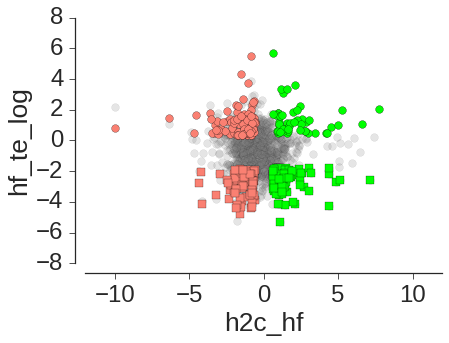

In [857]:

fig, ax = plt.subplots()
sns.set_style('ticks')
sns.despine(offset=10)
sns.set_context('paper', font_scale=3)
pathways.plot.scatter('h2c_hf','h2c_te_log',ax=ax , color='grey', alpha=0.2, s=60)
h2c.plot.scatter('h2c_hf', 'h2c_te_log', ax= ax, color='lime', s=60)
hfh.plot.scatter('h2c_hf', 'hf_te_log', ax=ax, color='salmon', s=60)
h2c_lote.plot.scatter('h2c_hf', 'h2c_te_log', ax= ax, color='lime', s=60, marker='s')
hfh_lote.plot.scatter('h2c_hf', 'hf_te_log', ax=ax, color='salmon',s=60, marker='s')
plt.xlim(-12,12)
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/log2H2CO2_HFratio_mRNA_vs_H2CO2_hf_TE_lows.pdf',
           bbox_inches='tight')

In [31]:
lo_h2c=set(h2c_lote[h2c_lote.Subsystem.str.contains('Flagellum')].gene_id)

In [32]:
hi_h2c=set(h2c[h2c.Subsystem.str.contains('Flagellum')].gene_id)

In [33]:
lo_co=set(co_lote[co_lote.Subsystem.str.contains('Flagellum')].gene_id)

In [34]:
hi_co=set(co[co.Subsystem.str.contains('Flagellum')].gene_id)

In [35]:
from matplotlib_venn import venn2

In [36]:
ll=lo_co.union(lo_h2c)
hh =hi_co.union(hi_h2c)

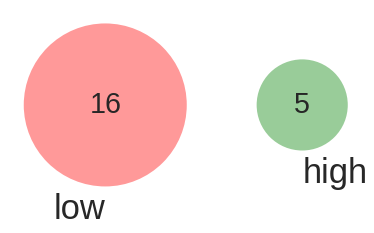

In [37]:
v = venn2(subsets=[ll,hh], set_labels=('low', 'high'))

In [38]:
#autotrophic
h2c_cats=h2c.groupby(['Category'])['gene_id'].count().to_frame().reset_index()
co_cats=co.groupby(['Category'])['gene_id'].count().to_frame().reset_index()
autotrophic=pd.merge(h2c_cats,co_cats, on='Category', how='outer')

autotrophic.fillna(0, inplace=True, axis=0)
autotrophic.loc[:,'category count_auto']=autotrophic.gene_id_x + autotrophic.gene_id_y
autotrophic.drop(['gene_id_x', 'gene_id_y'], axis=1, inplace=True)


#heterotrophic
hfc_cats=hfc.groupby('Category')['gene_id'].count().to_frame().reset_index()
hfh_cats=hfh.groupby('Category')['gene_id'].count().to_frame().reset_index()
heterotrophic=pd.merge(hfc_cats, hfh_cats, on='Category', how='outer')

heterotrophic.fillna(0,axis=0, inplace=True)
heterotrophic.loc[:,'category count_hetro']=heterotrophic.gene_id_x + heterotrophic.gene_id_y
heterotrophic.drop(['gene_id_x', 'gene_id_y'], axis=1, inplace=True)

both=pd.merge(autotrophic, heterotrophic, on='Category', how='outer').fillna(0,axis=0 )
both.sort_values(by='category count_auto', inplace=True, ascending=False)

In [66]:
#autotrophic_low

h2c_cats_low=h2c_lote.groupby(['Category'])['gene_id'].count().to_frame().reset_index()
co_cats_low=co_lote.groupby(['Category'])['gene_id'].count().to_frame().reset_index()
autotrophic_low=pd.merge(h2c_cats_low,co_cats_low, on='Category', how='outer')

autotrophic_low.fillna(0, inplace=True, axis=0)
autotrophic_low.loc[:,'category count_auto']=autotrophic_low.gene_id_x + autotrophic_low.gene_id_y
autotrophic_low.drop(['gene_id_x', 'gene_id_y'], axis=1, inplace=True)


#heterotrophic_low
hfc_cats_low=hfc_lote.groupby('Category')['gene_id'].count().to_frame().reset_index()
hfh_cats_low=hfh_lote.groupby('Category')['gene_id'].count().to_frame().reset_index()
heterotrophic_low=pd.merge(hfc_cats_low, hfh_cats_low, on='Category', how='outer')

heterotrophic_low.fillna(0,axis=0, inplace=True)
heterotrophic_low.loc[:,'category count_hetro']=heterotrophic_low.gene_id_x + heterotrophic_low.gene_id_y
heterotrophic_low.drop(['gene_id_x', 'gene_id_y'], axis=1, inplace=True)

both_low=pd.merge(autotrophic_low, heterotrophic_low, on='Category', how='outer').fillna(0,axis=0 )
both_low.sort_values(by='category count_auto', inplace=True, ascending=False)

In [249]:
autotrophic.head()

NameError: name 'autotrophic' is not defined

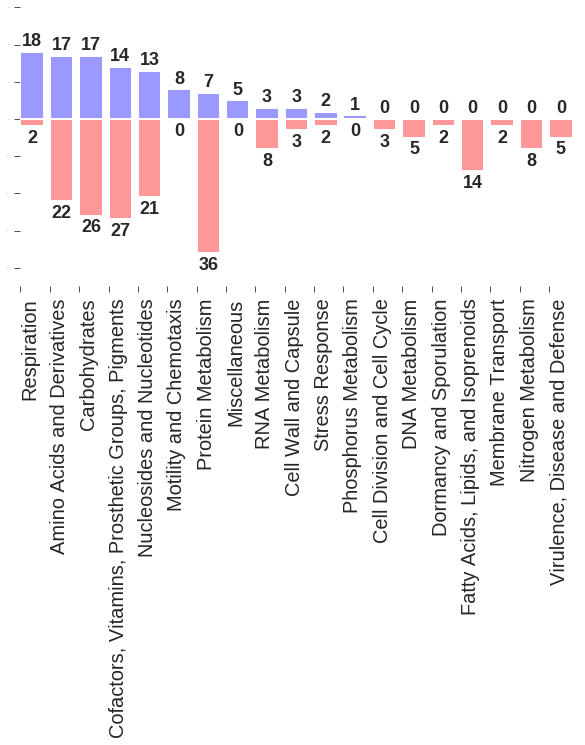

In [46]:
fig, ax= plt.subplots(figsize=(10,5))

sns.set_style('ticks')
sns.despine(left=True, bottom=True)
n=len(both)
X = np.arange(n)
Y1 = np.array(both['category count_auto'])
Y2 = np.array(both['category count_hetro'])

ax.bar(X, +Y1, facecolor='#9999ff', edgecolor='white', linewidth=2)
ax.bar(X, -Y2, facecolor='#ff9999', edgecolor='white', linewidth=2)

for x,y in zip(X,Y1):
    ax.text(x+0.4, y+0.5, '%.0f' % y, ha='center', va= 'bottom', fontweight='bold',fontsize=18 )
for x1, y1, in zip (X, Y2):
    ax.text(x1+0.4, -y1-5.5, '%.0f' % y1, ha='center', va='bottom', fontweight='bold',fontsize=18)
ax.set_ylim(-45, 30)
ax.set_xlim(0,n)
plt.xticks(X)
ticks=list(np.array(both.Category))
ax.set_xticklabels(np.array(ticks))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
    label.set_fontsize(20)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(0)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/mRNA_abundance_vs_differntialTE.pdf',
           bbox_inches='tight')
plt.show()

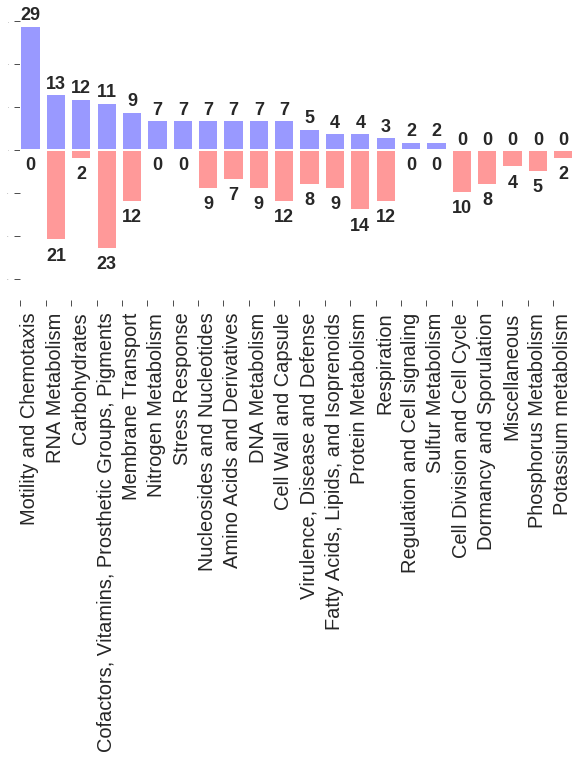

In [47]:
#low
fig, ax= plt.subplots(figsize=(10,5))

sns.set_style('ticks')
sns.despine(left=True, bottom=True)
n=len(both_low)
X = np.arange(n)
Y1 = np.array(both_low['category count_auto'])
Y2 = np.array(both_low['category count_hetro'])

ax.bar(X, +Y1, facecolor='#9999ff', edgecolor='white', linewidth=2)
ax.bar(X, -Y2, facecolor='#ff9999', edgecolor='white', linewidth=2)

for x,y in zip(X,Y1):
    ax.text(x+0.4, y+0.5, '%.0f' % y, ha='center', va= 'bottom', fontweight='bold',fontsize=18 )
for x1, y1, in zip (X, Y2):
    ax.text(x1+0.4, -y1-5.5, '%.0f' % y1, ha='center', va='bottom', fontweight='bold',fontsize=18)
ax.set_ylim(-35, 30)
ax.set_xlim(0,n)
plt.xticks(X)
ticks=list(np.array(both_low.Category))
ax.set_xticklabels(np.array(ticks))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
    label.set_fontsize(20)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(0)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/mRNA_abundance_vs_differntialTE_low.pdf',
           bbox_inches='tight')
plt.show()

## at the subsystem level

In [944]:
#autotrophic
autotrophic=pd.merge(h2c,co, how='outer')
autotrophic=autotrophic.groupby(['Subsystem','subsystem_count'])['gene_id'].count().to_frame().reset_index()


autotrophic.fillna(0, inplace=True, axis=0)
autotrophic.loc[:,'Subsystem count_auto']=(autotrophic.gene_id / autotrophic.subsystem_count) *100
autotrophic=autotrophic[autotrophic.gene_id > 1]

autotrophic_high=autotrophic.sort_values(by='Subsystem count_auto', ascending=False).head(10)

In [945]:

#heterotrophic
heterotrophic=pd.merge(hfc, hfh, how='outer')
heterotrophic=heterotrophic.groupby(['Subsystem', 'subsystem_count'])['gene_id'].count().to_frame().reset_index()



heterotrophic.fillna(0,axis=0, inplace=True)
heterotrophic.loc[:,'Subsystem count_hetero']=(heterotrophic.gene_id / heterotrophic.subsystem_count) *100
heterotrophic=heterotrophic[heterotrophic.gene_id >1]
heterotrophic_high=heterotrophic.sort_values(by='Subsystem count_hetero', ascending=False).head(10)

In [946]:
both=pd.concat([autotrophic_high, heterotrophic_high], axis=0).fillna(0)

In [869]:
pd.merge(h2c,co, how='outer').to_excel('/home/m/Desktop/highTE_auto.xls')
pd.merge(hfc, hfh, how='outer').to_excel('/home/m/Desktop/highTE_hetero.xls')
pd.merge(h2c_lote, co_lote, how='outer').to_excel('/home/m/Desktop/lowTE_auto.xls')
pd.merge(hfc_lote, hfh_lote, how='outer').to_excel('/home/m/Desktop/lowTE_hetero.xls')


In [948]:
both.to_excel('/home/m/Dropbox/Clostridium_paper/fig6_highTE_SubsystemDF.xls')
both_low.to_excel('/home/m/Dropbox/Clostridium_paper/fig6_lowTE_SubsystemDF.xls')

In [942]:
len(both_low)

20

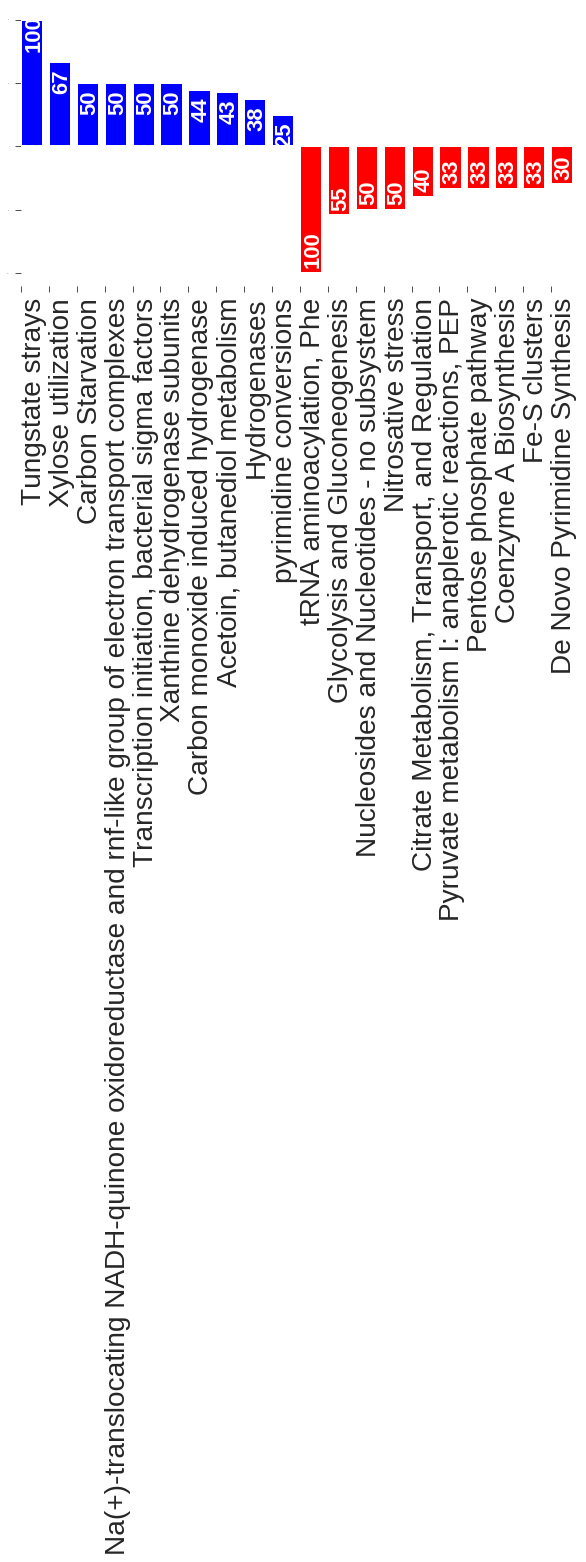

In [220]:
fig, ax= plt.subplots(figsize=(10,5))

sns.set_style('ticks')
sns.despine(left=True, bottom=True)
n=len(both)
X = np.arange(n)
Y1 = np.array(both['Subsystem count_auto'])
Y2 = np.array(both['Subsystem count_hetero'])

ax.bar(X, +Y1, facecolor='blue', edgecolor='white', linewidth=2)
ax.bar(X, -Y2, facecolor='red', edgecolor='white', linewidth=2)

for x,y in zip(X[0:10],Y1[0:10]):
    ax.text(x+0.46, y-25, '%.0f' % y, ha='center', va= 'bottom', fontweight='bold',fontsize=22, rotation=90,
           color='white')
for x1, y1, in zip (X[10:21], Y2[10:21]):
    ax.text(x1+0.46, -y1+4, '%.0f' % y1, ha='center', va='bottom', fontweight='bold',fontsize=22, rotation=90,
           color='white')
ax.set_ylim(-110, 110)
ax.set_xlim(0,n)
plt.xticks(X)
ticks=list(np.array(both.Subsystem))
ax.set_xticklabels(np.array(ticks))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
    label.set_fontsize(28)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(0)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/mRNA_abundance_vs_differntialTE_subsystem.pdf',
           bbox_inches='tight')
plt.show()

In [5]:
category_hi_auto=['Fermentation','Respiration', 'Nucleic acid', 'Stress','Carbohydrate']
freq_hi_auto=[2,4,2,1,1]
hi_auto_df=pd.DataFrame({'category':category_hi_auto,'Frequency':freq_hi_auto}).sort_values(by='Frequency', ascending=False)

In [14]:
hi_auto_df

,Frequency,category
1,4,Respiration
0,2,Fermentation
2,2,Nucleic acid
3,1,Stress
4,1,Carbohydrate


In [947]:
#autotrophic_low
autotrophic_low=pd.merge(h2c_lote, co_lote, how='outer')
autotrophic_low=autotrophic_low.groupby(['Subsystem', 'subsystem_count'])['gene_id'].count().to_frame().reset_index()


autotrophic_low.fillna(0, inplace=True, axis=0)
autotrophic_low.loc[:,'Subsystem count_auto']=(autotrophic_low.gene_id /autotrophic_low.subsystem_count) *100
autotrophic_low=autotrophic_low[autotrophic_low.gene_id >1]
autotrophic_low=autotrophic_low.sort_values(by='Subsystem count_auto', ascending=False).head(10)


#heterotrophic_low
heterotrophic_low=pd.merge(hfc_lote, hfh_lote, how='outer')
heterotrophic_low=heterotrophic_low.groupby(['Subsystem', 'subsystem_count'])['gene_id'].count().to_frame().reset_index()



heterotrophic_low.fillna(0,axis=0, inplace=True)
heterotrophic_low.loc[:,'Subsystem count_hetero']=(heterotrophic_low.gene_id /heterotrophic_low.subsystem_count)*100
heterotrophic_low=heterotrophic_low[heterotrophic_low.gene_id>1]

heterotrophic_low=heterotrophic_low.sort_values(by='Subsystem count_hetero', ascending=False).head(10)


both_low= pd.concat([autotrophic_low, heterotrophic_low], axis=0).fillna(0)

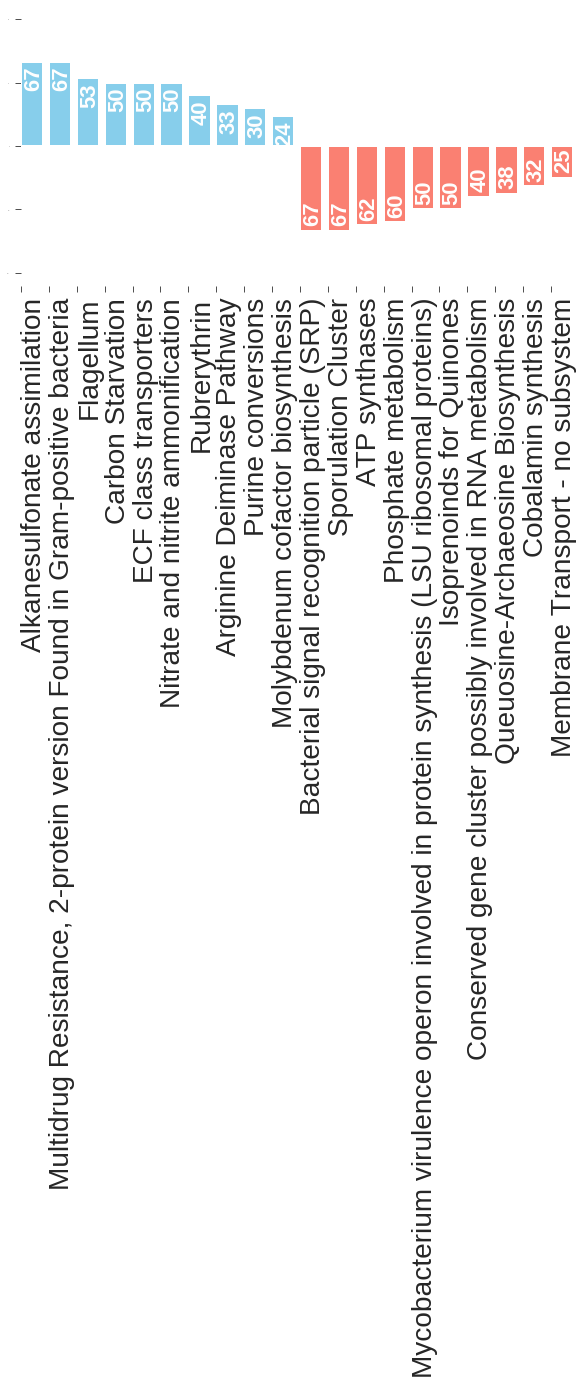

In [221]:
fig, ax= plt.subplots(figsize=(10,5))

sns.set_style('ticks')
sns.despine(left=True, bottom=True)
n=len(both)
X = np.arange(n)
Y1 = np.array(both_low['Subsystem count_auto'])
Y2 = np.array(both_low['Subsystem count_hetero'])

ax.bar(X, +Y1, facecolor='skyblue', edgecolor='white', linewidth=2)
ax.bar(X, -Y2, facecolor='salmon', edgecolor='white', linewidth=2)

for x,y in zip(X[0:10],Y1[0:10]):
    ax.text(x+0.46, y-23, '%.0f' % y, ha='center', va= 'bottom', fontweight='bold',fontsize=22, rotation=90,
           color='white')
for x1, y1, in zip (X[10:21], Y2[10:21]):
    ax.text(x1+0.46, -y1+4, '%.0f' % y1, ha='center', va='bottom', fontweight='bold',fontsize=22, rotation=90,
           color='white')
ax.set_ylim(-110, 110)
ax.set_xlim(0,n)
plt.xticks(X)
ticks=list(np.array(both_low.Subsystem))
ax.set_xticklabels(np.array(ticks))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
    label.set_fontsize(28)
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(0)
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/mRNA_abundance_vs_differntialTE_subsystem_low.pdf',
           bbox_inches='tight')
plt.show()

## Analysis of the UTR of high and low TE genes in both autotrophic and heterotrophic

In [55]:
from Bio.SeqUtils import GC

In [56]:
infile = SeqIO.read('/home/m/genome_files/REF-seq_CLJU.gbk','gb')
genes =[]
name = []
product = []
func = []
strand = []
start = []
stop = []
aaseq = []
cds_seq = []

    #genome_seq_df = pd.DataFrame({'sequence':list(str(infile.seq))},index=range(1,len(str(infile.seq))+1))
for feature in infile.features:
    if feature.type == 'CDS' or feature.type == 'rRNA' or feature.type == 'tRNA':  #Only cares for coding sequences which are not pseudogenes
        genes.append(feature.qualifiers['locus_tag'][0])
        try: name.append(feature.qualifiers['gene'][0])
        except: name.append('')
        product.append(feature.qualifiers['product'][0])
        cds_seq.append(feature.location.extract(infile.seq).tostring())
        if 'function' in feature.qualifiers:                       #not all genes have known functions
            func.append(feature.qualifiers['function'][0])
        else:
            func.append("N/A")
        try:
            aaseq.append(feature.qualifiers['translation'][0])
        except:
            aaseq.append("N/A")
        if feature.strand == 1:
            strand.append("plus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
        elif feature.strand == -1:
            strand.append("minus")
            start.append(feature.location.start.real+1)
            stop.append(feature.location.end.real)
gene_df = pd.DataFrame({"gene_id": genes, "name": name, "product": product, "function": func, "strand": strand, "start": start, "stop": stop, "cds_seq":cds_seq,"aaseq": aaseq},
                          columns = ["gene_id", "name", "function", "product", "strand", "start", "stop", "cds_seq","aaseq"])

/home/m/anaconda2/lib/python2.7/site-packages/Bio/Seq.py:341: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


In [43]:
gcpercent=[]
for i,r in gene_df.iterrows():
    gcpercent.append(100 - GC(r['cds_seq']))

gene_df.loc[:,'AU']=gcpercent

In [44]:
gene_df=gene_df[['gene_id','AU']]

In [45]:
auto_high = pd.merge(co, h2c, how='outer')
auto_low  = pd.merge(co_lote, h2c_lote, how='outer')

In [46]:
hetero_high= pd.merge(hfc, hfh, how='outer')
hetero_low = pd.merge(hfc_lote, hfh_lote, how='outer')

In [47]:
auto_high=pd.merge(auto_high,gene_df)
auto_low =pd.merge(auto_low,gene_df)

In [48]:
hetero_high=pd.merge(hetero_high,gene_df)
hetero_low=pd.merge(hetero_low,gene_df)

In [49]:
at_auto=sp.stats.mannwhitneyu(auto_high.up_ATpercent, auto_low.up_ATpercent)[1] #URR AU
rbs_auto=sp.stats.mannwhitneyu(auto_high.RBS_dg, auto_low.RBS_dg)[1]
dist_auto=sp.stats.mannwhitneyu(auto_high.RBS_dist_ATG, auto_low.RBS_dist_ATG)[1]
cai_auto=sp.stats.mannwhitneyu(auto_high.cai, auto_low.cai)[1]
au_auto =sp.stats.mannwhitneyu(auto_high.AU, auto_low.AU)[1] #coding region AU

In [50]:
at_auto, rbs_auto, dist_auto, cai_auto, au_auto

(5.817869208776884e-05,
 0.0025898596793564872,
 0.084888488366770765,
 6.8596597672969742e-05,
 6.564988586063402e-10)

In [51]:
at_hetero=sp.stats.mannwhitneyu(hetero_high.up_ATpercent, hetero_low.up_ATpercent)[1]
rbs_hetero=sp.stats.mannwhitneyu(hetero_high.RBS_dg, hetero_low.RBS_dg)[1]
dist_hetero=sp.stats.mannwhitneyu(hetero_high.RBS_dist_ATG, hetero_low.RBS_dist_ATG)[1]
cai_hetero=sp.stats.mannwhitneyu(hetero_high.cai, hetero_low.cai)[1]
au_hetero =sp.stats.mannwhitneyu(hetero_high.AU, hetero_low.AU)[1]

In [52]:
at_hetero,rbs_hetero,dist_hetero,cai_hetero,au_hetero

(0.0023246268793540971,
 6.3733187817716289e-05,
 0.015464649059346414,
 0.00030518170366824527,
 1.1966069435393518e-07)

In [53]:
auto_high['cat']='high'
auto_low['cat']='low'

In [58]:
len(hetero_low)+ len(hetero_high), len(auto_high) + len(auto_low) 

(196, 159)

In [54]:
auto_hi_lo=pd.concat([auto_high, auto_low])

In [55]:
len(auto_hi_lo), len(hetero_hi_lo)

NameError: name 'hetero_hi_lo' is not defined

In [69]:
hetero_high['cat']='high'
hetero_low['cat']='low'

In [70]:
hetero_hi_lo=pd.concat([hetero_high,hetero_low])

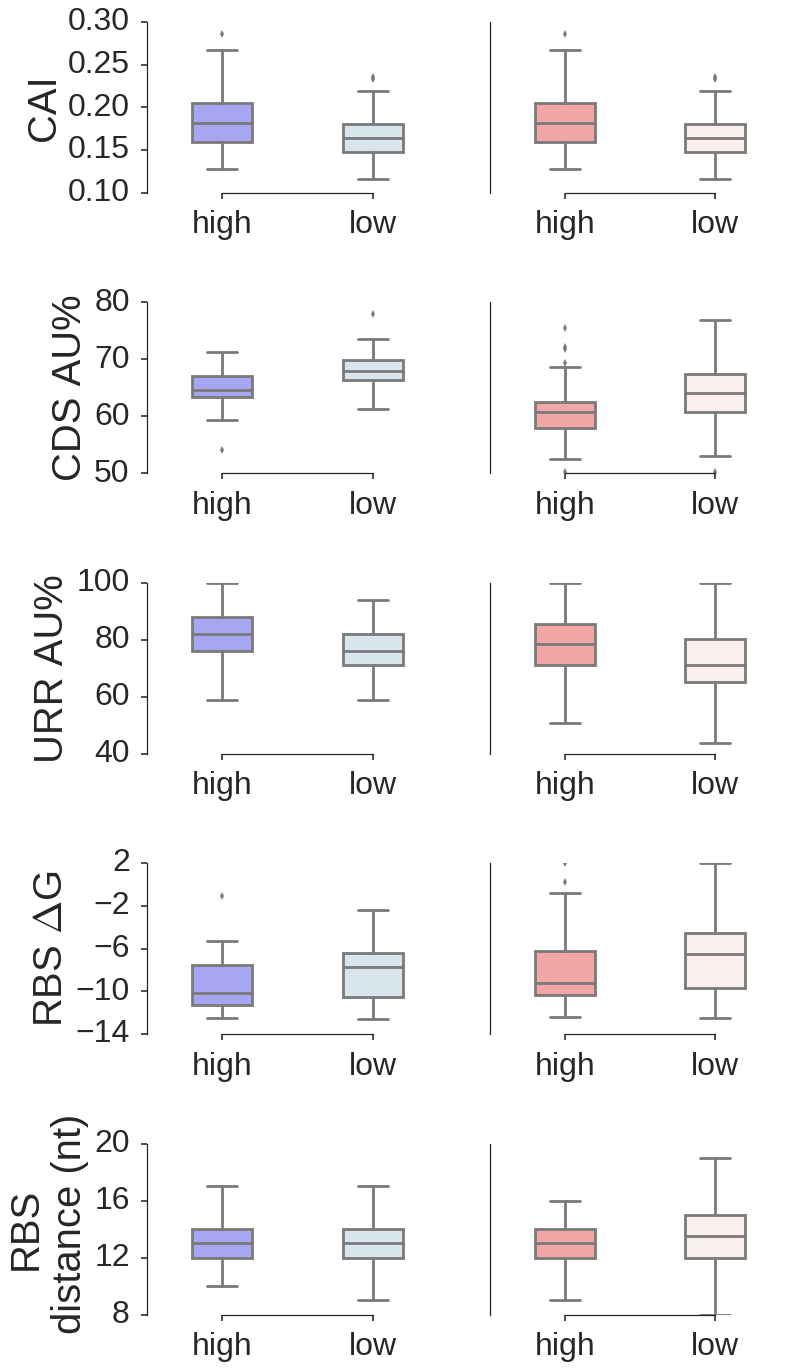

In [72]:
fig, ((ax1,ax6),(ax2,ax7),(ax3,ax8),(ax4,ax9),(ax5,ax10)) = plt.subplots(ncols=2, nrows=5,figsize=(12,20))
sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.cai, width=0.4, ax=ax1, palette=('#9999ff','#D4E6F1'))
ax1.set_ylabel('CAI', fontsize=40)
ax1.set_xlabel('')

sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.AU, width=0.4, ax=ax2,palette=('#9999ff','#D4E6F1'))
ax2.set_yticks([50,60,70,80])
ax2.set_ylabel('CDS AU%', fontsize=40)
ax2.set_xlabel('')

sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.up_ATpercent, width=0.4, ax=ax3, palette=('#9999ff','#D4E6F1'),
           showfliers=False)
ax3.set_yticks([40,60,80,100])
ax3.set_ylabel('URR AU%', fontsize=40)
ax3.set_xlabel('')

sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.RBS_dg, width=0.4, ax=ax4, palette=('#9999ff','#D4E6F1') )
ax4.set_yticks([-14, -10, -6, -2,2])
ax4.set_ylabel('RBS $\Delta$G', fontsize=40)
ax4.set_xlabel('')

sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.RBS_dist_ATG, width=0.4, ax=ax5,palette=('#9999ff','#D4E6F1'),
           showfliers=False)
ax5.set_yticks([8,12,16,20])
ax5.set_ylabel('RBS\n distance (nt)', fontsize=40)
ax5.set_xlabel('')


#####Heterotrophic
sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.cai, width=0.4, ax=ax6, palette=('#ff9999','#FDEDEC'))
ax6.set_yticks([])
ax6.set_ylabel('')
ax6.set_xlabel('')

sns.boxplot(x=hetero_hi_lo.cat, y=hetero_hi_lo.AU, width=0.4, ax=ax7,palette=('#ff9999','#FDEDEC'))
ax7.set_yticks([])
ax7.set_ylabel('')
ax7.set_xlabel('')

sns.boxplot(x=hetero_hi_lo.cat, y=hetero_hi_lo.up_ATpercent, width=0.4, ax=ax8, palette=('#ff9999','#FDEDEC'),
           showfliers=False)
ax8.set_yticks([])
ax8.set_ylabel('')
ax8.set_xlabel('')

sns.boxplot(x=hetero_hi_lo.cat, y=hetero_hi_lo.RBS_dg, width=0.4, ax=ax9, palette=('#ff9999','#FDEDEC'))
ax9.set_yticks([])
ax9.set_ylabel('')
ax9.set_xlabel('')

sns.boxplot(x=hetero_hi_lo.cat, y=hetero_hi_lo.RBS_dist_ATG, width=0.4, ax=ax10,palette=('#ff9999','#FDEDEC'),
           showfliers=False)
ax10.set_yticks([])
ax10.set_ylabel('')
ax10.set_xlabel('')

sns.despine(trim=True)
sns.set_context('poster', font_scale=2)
plt.tight_layout()
plt.savefig('/home/m/Dropbox/Clostridium_paper/figs/mRNA_high_low_TE_feature_comparison.pdf',
           bbox_inches='tight')

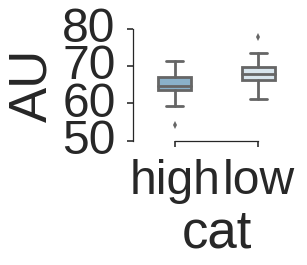

In [67]:
fig, ax = plt.subplots(figsize=(3,2))
sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.AU, width=0.4, ax=ax,palette=('#7FB3D5','#D4E6F1'))
ax.set_yticks([50,60,70,80])
sns.despine(trim=True)

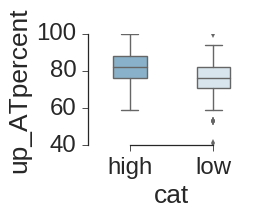

In [36]:
fig, ax = plt.subplots(figsize=(3,2))
sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.up_ATpercent, width=0.4, ax=ax, palette=('#7FB3D5','#D4E6F1'))
ax.set_yticks([40,60,80,100])
sns.despine(trim=True)

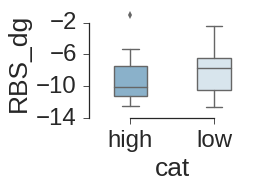

In [37]:
fig, ax = plt.subplots(figsize=(3,2))
sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.RBS_dg, width=0.4, ax=ax, palette=('#7FB3D5','#D4E6F1'))
ax.set_yticks([-14, -10, -6, -2])
sns.despine(trim=True)

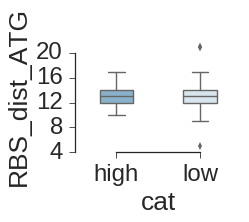

In [38]:
fig, ax = plt.subplots(figsize=(3,2))
sns.boxplot(x=auto_hi_lo.cat, y=auto_hi_lo.RBS_dist_ATG, width=0.4, ax=ax,palette=('#7FB3D5','#D4E6F1'))
ax.set_yticks([4,8,12,16,20])
sns.despine(trim=True)

In [188]:
 aupercent=(pathways.groupby('Subsystem')['up_ATpercent'].sum() / pathways.groupby('Subsystem')['gene_id'].count()).to_frame(name='AU_percent').reset_index()

In [189]:
dist= (pathways.groupby('Subsystem')['RBS_dist_ATG'].sum() / pathways.groupby('Subsystem')['gene_id'].count()).to_frame(name='distance').reset_index()

In [190]:
rbs=abs((pathways.groupby('Subsystem')['RBS_dg'].sum() / pathways.groupby('Subsystem')['gene_id'].count())).to_frame(name='RBS').reset_index()

In [191]:
co=(pathways.groupby('Subsystem')['co_te'].sum() / pathways.groupby('Subsystem')['gene_id'].count()).to_frame(name='co_te').reset_index()
hf=(pathways.groupby('Subsystem')['hf_te'].sum() / pathways.groupby('Subsystem')['gene_id'].count()).to_frame(name='hf_te').reset_index()
h2c=(pathways.groupby('Subsystem')['h2c_te'].sum() / pathways.groupby('Subsystem')['gene_id'].count()).to_frame(name='h2c_te').reset_index()

In [193]:
grouped=pd.merge(aupercent,dist)
grouped=pd.merge(grouped,rbs)
grouped=pd.merge(grouped,co)
grouped=pd.merge(grouped,hf)
grouped=pd.merge(grouped,h2c)

In [194]:
grouped.loc[:,'dco_hf']=grouped.co_te - grouped.hf_te
grouped.loc[:,'dco_h2c']=grouped.co_te - grouped.h2c_te
grouped.loc[:,'dh2c_hf']=grouped.h2c_te - grouped.hf_te

In [217]:
test=grouped[['Subsystem','RBS','distance','AU_percent','co_te','hf_te','h2c_te']]
test.set_index('Subsystem', inplace=True)

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler=MinMaxScaler()
xx=scaler.fit_transform(test)

In [220]:
df=pd.DataFrame(xx)

In [221]:
df.head()

,0,1,2,3,4,5
0,0.692460,0.546875,0.377660,0.077292,0.019163,0.048443
1,0.666667,0.500000,0.872340,0.065604,0.018948,0.037413
2,0.736111,0.507812,0.682181,0.499979,0.134279,0.842071
3,0.664286,0.487500,0.508511,0.125054,0.030534,0.136215
4,0.571429,1.000000,0.382979,0.184054,0.048910,0.190207


In [204]:
cols=test.index

In [206]:
len(cols)

236

In [222]:
df.columns=['RBS','distance','AU_percent','co_te','hf_te','h2c_te']

In [223]:
df=df.transpose()

In [224]:
df.columns=cols

In [225]:
df=df.transpose()

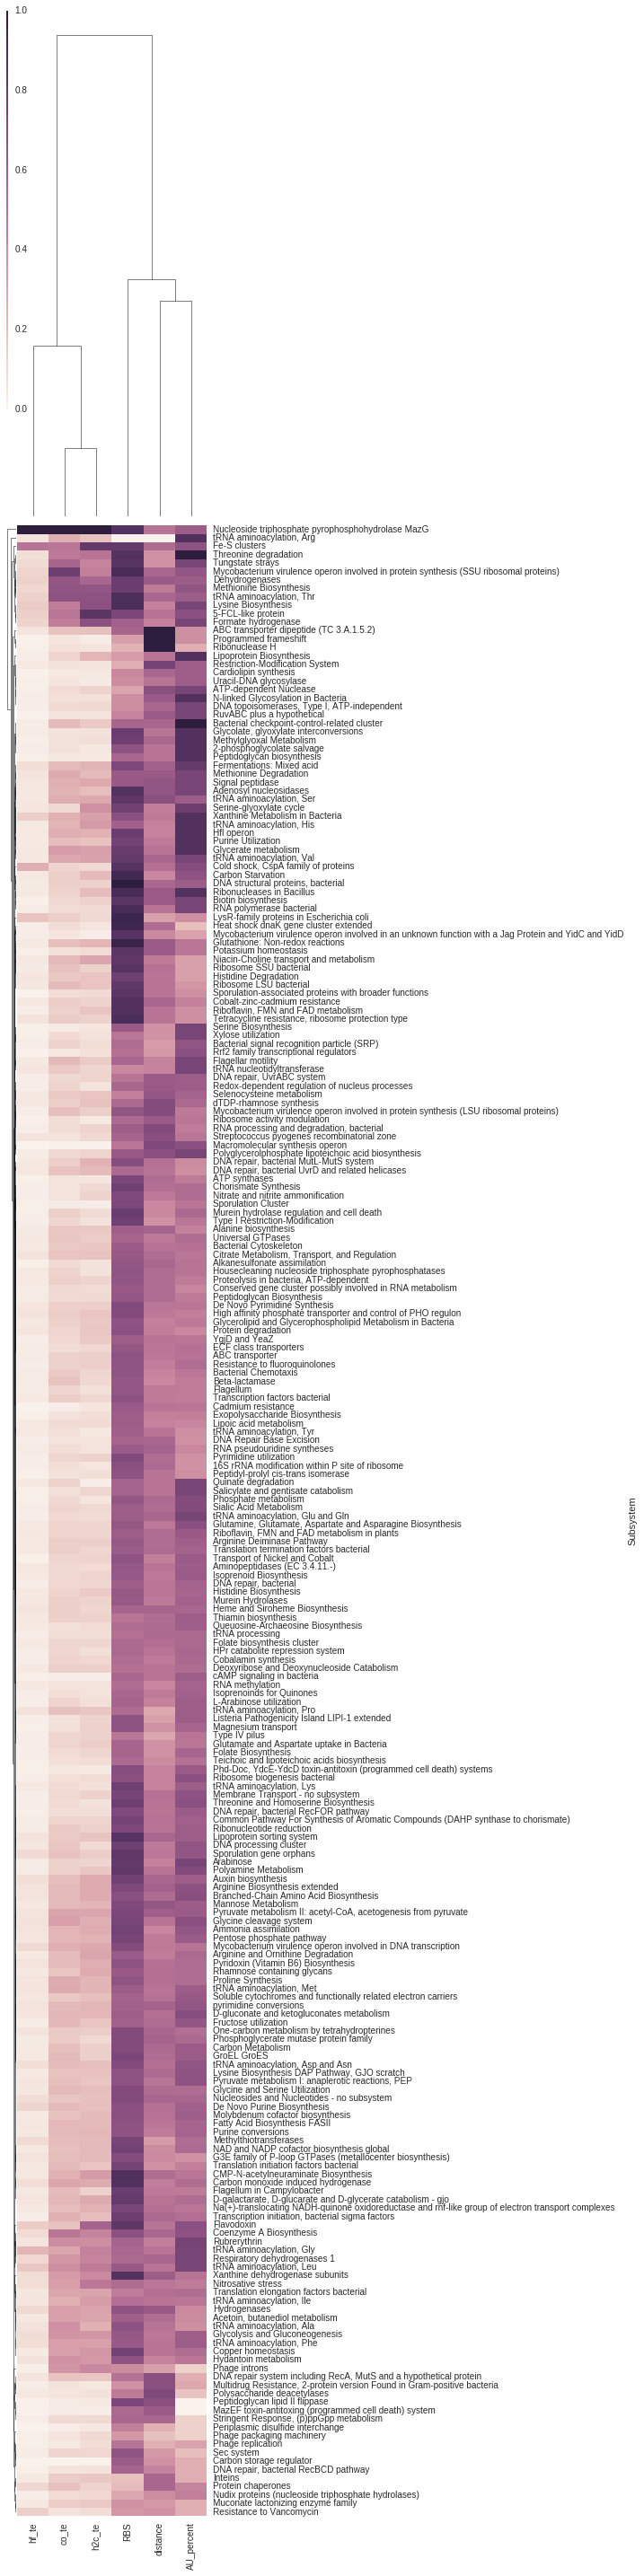

In [228]:
cg=sns.clustermap(df, figsize=(4,50))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [239]:
df.reset_index(inplace=True)

In [249]:
test=df[(df.Subsystem.str.contains('tRNA')) | (df.Subsystem.str.contains('Glycolysis'))]
test.set_index('Subsystem', inplace=True)

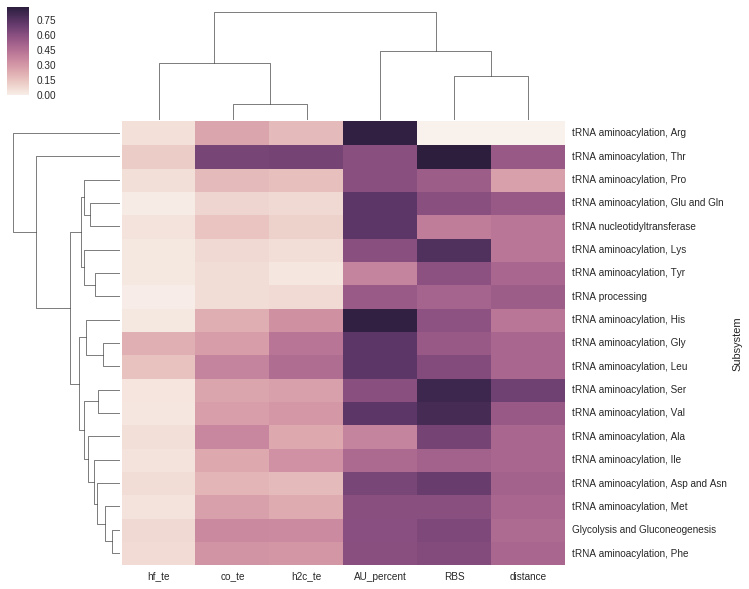

In [252]:
cg=sns.clustermap(test)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()